# Libraries Uploading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
from math import pi 
from PIL import Image
from IPython.display import display
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# Data Importing

 **Load Dataset**

Loading Orders and Customers dataset for data cleaning


In [2]:
df_customer = pd.read_excel(r'C:\Users\omoto\OneDrive\Desktop\RBS\Capstone\Code and Data\data\Dataset - ORAFASHION\Customers.xlsx')
df_order = pd.read_excel(r'C:\Users\omoto\OneDrive\Desktop\RBS\Capstone\Code and Data\data\Dataset - ORAFASHION\Orders1.0.xlsx')
description = pd.read_excel(r'C:\Users\omoto\OneDrive\Desktop\RBS\Capstone\Code and Data\data\Dataset - ORAFASHION\Orders1.0.xlsx', sheet_name ='product description ', header=0, index_col=False)

# Data Cleaning and Preprocessing


**Data Cleaning** 

Checking Datatypes and shape of customer dataset to ensure that the data is in the correct format and structure for analysis or modeling.

In [3]:
print('Shape of the Customer dataframeL: ', df_customer.shape)
df_customer.info()
df_customer.head()
#df_customer

Shape of the Customer dataframeL:  (22625, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22625 entries, 0 to 22624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer_ID  22625 non-null  int64 
 1   GENDER       22625 non-null  object
 2   AGE          22625 non-null  int64 
 3   GEOGRAPHY    22625 non-null  object
dtypes: int64(2), object(2)
memory usage: 707.2+ KB


,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,M,43,Greece
1,822,M,42,Spain
2,3686,F,39,France
3,3719,F,30,Italy
4,9200,F,31,Italy


**Checking the statistics for the df_customer dataframe**

In [4]:
df_customer.describe()

,Customer_ID,AGE
count,22625.000000,22625.000000
mean,11313.000000,35.563801
std,6531.419256,6.958067
min,1.000000,18.000000
25%,5657.000000,31.000000
50%,11313.000000,36.000000
75%,16969.000000,40.000000
max,22625.000000,62.000000


**Data Cleaning**

Checking Datatypes and shape of order dataset. We observed that the Sales_Amount column had different number format therefore we rounded off the column to 2.

In [5]:
print('Shape of the Order dataframeL: ', df_order.shape)
df_order.info()
df_order.head()


#df_order

Shape of the Order dataframeL:  (131706, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              131706 non-null  int64         
 1   Date            131706 non-null  datetime64[ns]
 2   Customer_ID     131706 non-null  int64         
 3   Transaction_ID  131706 non-null  int64         
 4   SKU_Category    131706 non-null  object        
 5   SKU             131706 non-null  object        
 6   Quantity        131706 non-null  float64       
 7   Sales_Amount    131706 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 8.0+ MB


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88


**Checking the statistics for the df_order dataframe**

In [6]:
df_order.describe()

,id,Date,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,2021-07-04 21:39:26.379663616,12386.450367,32389.604187,1.485318,11.981524
min,1.000000,2021-01-02 00:00:00,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,2021-04-05 00:00:00,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,2021-07-02 00:00:00,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,2021-10-07 00:00:00,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,2021-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000
std,38020.391614,NaN,6086.447552,18709.901238,3.872666,19.359699


**Removing rows and rounding up the Quantity Values**

Some Quantity values are less than 1 therefore we need to drop rows that are less than 0.5 and round off rows that are 0.5 and above to 1 whole number. The rows reduced from 131706 to 131467

In [7]:
# Replace values between 0.5 and 0.99 with 1
df_order.loc[(df_order['Quantity'] >= 0.5) & (df_order['Quantity'] <= 0.999), 'Quantity'] = 1
 
# Remove rows where quantity is between 0 and 0.49
df_order = df_order[(df_order['Quantity'] < 0) | (df_order['Quantity'] >= 0.5)]

In [8]:
df_order.describe()

,id,Date,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131467.000000,131467,131467.000000,131467.000000,131467.000000,131467.000000
mean,65849.400899,2021-07-04 21:17:31.765081600,12386.164018,32386.924141,1.487776,11.981115
min,1.000000,2021-01-02 00:00:00,1.000000,1.000000,1.000000,0.020000
25%,32917.500000,2021-04-05 00:00:00,7349.000000,16129.500000,1.000000,4.230000
50%,65850.000000,2021-07-02 00:00:00,13500.000000,32617.000000,1.000000,6.920000
75%,98776.500000,2021-10-07 00:00:00,17305.000000,48547.000000,1.000000,12.330000
max,131706.000000,2021-12-31 00:00:00,22625.000000,64682.000000,400.000000,707.730000
std,38021.816874,NaN,6085.639539,18710.058893,3.875795,19.371915


**Merging the Orders and Customers Dataset**

In [9]:
#Merging two datasets into one
merged_df = df_order.merge(df_customer, how = 'inner', left_on = 'Customer_ID', right_on = 'Customer_ID' )
merged_df

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
1,639,2021-01-04,2547,332,Q4N,MM3E0,1.0,12.69,M,43,Greece
2,7800,2021-01-25,2547,3743,X52,885U7,1.0,4.95,M,43,Greece
3,7801,2021-01-25,2547,3743,29A,A59HR,3.0,6.24,M,43,Greece
4,17633,2021-02-22,2547,8477,L9F,7W8WS,1.0,11.75,M,43,Greece
...,...,...,...,...,...,...,...,...,...,...,...
131462,131653,2021-07-04,5751,32874,LSD,NSGRM,1.0,11.02,F,34,Germany
131463,131654,2021-07-04,5751,32874,0H2,9Q5PZ,1.0,7.85,F,34,Germany
131464,131655,2021-07-04,5751,32874,D6J,52BYA,1.0,40.72,F,34,Germany
131465,131666,2021-07-04,10765,32881,Z4O,6IISH,1.0,1.19,F,43,Greece


**Dropping the Customer ID column**

In [10]:
#Dropping id column 
merged_df.drop(columns = ['id'],axis=1, inplace=True)
merged_df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
1,2021-01-04,2547,332,Q4N,MM3E0,1.0,12.69,M,43,Greece
2,2021-01-25,2547,3743,X52,885U7,1.0,4.95,M,43,Greece
3,2021-01-25,2547,3743,29A,A59HR,3.0,6.24,M,43,Greece
4,2021-02-22,2547,8477,L9F,7W8WS,1.0,11.75,M,43,Greece
...,...,...,...,...,...,...,...,...,...,...
131462,2021-07-04,5751,32874,LSD,NSGRM,1.0,11.02,F,34,Germany
131463,2021-07-04,5751,32874,0H2,9Q5PZ,1.0,7.85,F,34,Germany
131464,2021-07-04,5751,32874,D6J,52BYA,1.0,40.72,F,34,Germany
131465,2021-07-04,10765,32881,Z4O,6IISH,1.0,1.19,F,43,Greece


**Sorting the New Dataframe By Date**

In [11]:
#Sort the new dataframe by date
merged_df.sort_values(by=['Date'], inplace=True)
merged_df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany
...,...,...,...,...,...,...,...,...,...,...
105465,2021-12-31,20506,64602,0H2,549KK,1.0,5.71,M,35,Germany
94500,2021-12-31,10134,64603,0H2,CZUZX,1.0,6.54,F,28,Italy
54479,2021-12-31,17926,64620,P42,VVOG7,1.0,6.54,M,47,Netherlands
39708,2021-12-31,17061,64635,Q4N,G5878,1.0,7.23,F,29,Italy


**Creating a copy of the merged dataframe**

In [12]:
Original_df = merged_df.copy()

**Checking for missing data**

Missing data or null values should be either dropped from the dataset or replaced by mean or most frequent depending on relevance. Our observation is that there is no missing data on either the customers or orders dataset. We also checked for the missing dates and we found '2021-01-01', '2021-03-27', '2021-12-25'  meaning the shop was closed on Chistmass, Newyears and Easter.

In [13]:
#Checking for missing dates (HOLIDAYS)
# Setting the Date values as index
merged_df_index = merged_df.set_index('Date')
# to_datetime() method converts string 
# format to a DateTime object
merged_df_index.index = pd.to_datetime(merged_df_index.index)
# dates which are not in the sequence 
# are returned
print(pd.date_range(start="2021-01-01", end="2021-12-31").difference(merged_df_index.index))


DatetimeIndex(['2021-01-01', '2021-03-27', '2021-12-25'], dtype='datetime64[ns]', freq=None)


In [14]:
#Information according to new dataframe
merged_df.info()

#Missing value calculation
print('\n------------Missing value calculation------------')
merged_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 131467 entries, 0 to 110469
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            131467 non-null  datetime64[ns]
 1   Customer_ID     131467 non-null  int64         
 2   Transaction_ID  131467 non-null  int64         
 3   SKU_Category    131467 non-null  object        
 4   SKU             131467 non-null  object        
 5   Quantity        131467 non-null  float64       
 6   Sales_Amount    131467 non-null  float64       
 7   GENDER          131467 non-null  object        
 8   AGE             131467 non-null  int64         
 9   GEOGRAPHY       131467 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 11.0+ MB

------------Missing value calculation------------


Date              0
Customer_ID       0
Transaction_ID    0
SKU_Category      0
SKU               0
Quantity          0
Sales_Amount      0
GENDER            0
AGE               0
GEOGRAPHY         0
dtype: int64

**Changing values Customer ID and Transaction ID values from intergers to object, checking unique values and duplicate values**

We have noticed that the customer ID and Transaction ID values have INT64 datatype yet they should be object because they contain both numbers and characters. By checking unique values we find out that there are missing dates, we have 22600 customers,64548 transactions, 5229 SKUs.There are no duplicates in the dataset.

In [15]:
# Change column Customer_ID, Transaction_ID's, Date values to object
merged_df= merged_df.astype({'Customer_ID': object, 'Transaction_ID': object,})
merged_df.dtypes

Date              datetime64[ns]
Customer_ID               object
Transaction_ID            object
SKU_Category              object
SKU                       object
Quantity                 float64
Sales_Amount             float64
GENDER                    object
AGE                        int64
GEOGRAPHY                 object
dtype: object

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves examining and visualizing datasets to understand their main characteristics, discover patterns, detect anomalies, and form hypotheses for further analysis. The primary goal of EDA is to gain insights into the data and prepare it for modeling.

### Statistical Data Analysis

In [16]:
#describe()– Provide a statistics summary of data
merged_df.describe().round(2)

,Date,Quantity,Sales_Amount,AGE
count,131467,131467.00,131467.00,131467.00
mean,2021-07-04 21:17:31.765081600,1.49,11.98,35.42
min,2021-01-02 00:00:00,1.00,0.02,18.00
25%,2021-04-05 00:00:00,1.00,4.23,31.00
50%,2021-07-02 00:00:00,1.00,6.92,36.00
75%,2021-10-07 00:00:00,1.00,12.33,40.00
max,2021-12-31 00:00:00,400.00,707.73,62.00
std,NaN,3.88,19.37,7.06


**Value Counts in Geography**

Our observation is that Germany has the highest value counts. and UK has the lowest therefore there are more sales in German, Italy and France than in Greece Spain, Netherlands and UK.

In [17]:
merged_df["GEOGRAPHY"].value_counts()

GEOGRAPHY
Germany        37888
Italy          34067
France         22219
Greece         12790
Spain          10053
Netherlands     7659
UK              6791
Name: count, dtype: int64

### Visualization

#### Bar Plot of Number of Customers per country

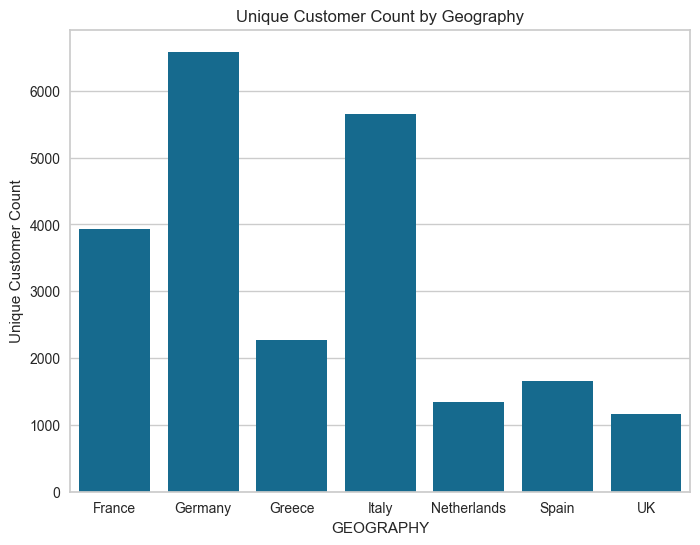

In [18]:
# Calculate unique customer counts by geography
unique_customer_counts = merged_df.groupby('GEOGRAPHY')['Customer_ID'].nunique().reset_index()
unique_customer_counts.columns = ['GEOGRAPHY', 'UniqueCustomerCount']

# Plot the data
fig, axes = plt.subplots(figsize=(8, 6))
sns.barplot(x='GEOGRAPHY', y='UniqueCustomerCount', data=unique_customer_counts, ax=axes)

# Add labels and title for better readability
axes.set_xlabel('GEOGRAPHY')
axes.set_ylabel('Unique Customer Count')
axes.set_title('Unique Customer Count by Geography')

# Show the plot
plt.show()

The bar chart presents the unique customer count by geography, showcasing the distribution of customers across various European countries. Germany leads with the highest unique customer count, exceeding 6,000, indicating a significant market presence and customer base. Italy follows with slightly over 5,000 unique customers, reflecting its strong market engagement. France comes next with approximately 4,000 unique customers, showing a robust yet smaller customer base compared to Germany and Italy. Greece has a moderate count of unique customers, nearing 3,000, while Spain and the Netherlands exhibit lower but notable counts, with Spain slightly ahead. The UK has the smallest unique customer base among the displayed countries, similar to the Netherlands but marginally lower. This distribution highlights Germany's dominance and the considerable customer bases in Italy and France, while other countries like Greece, Spain, Netherlands, and the UK represent smaller but important segments of the market. This geographical analysis provides insights into market penetration and potential areas for strategic focus or growth.

#### Bar Plot of of Gender

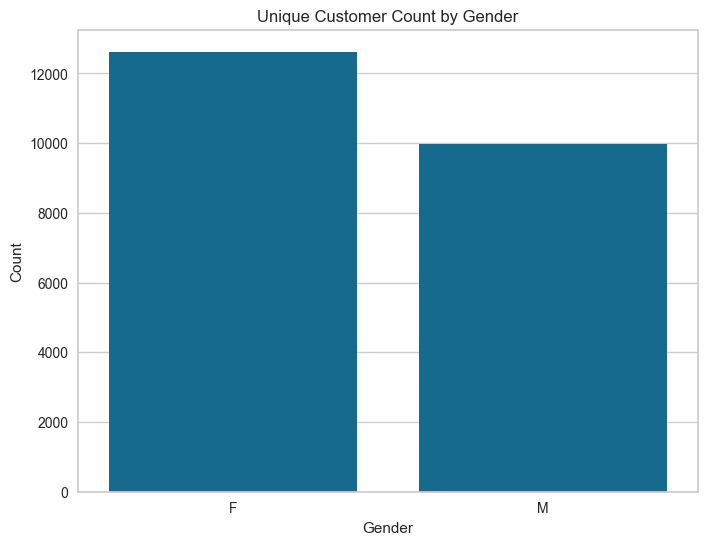

GENDER
F    12624
M     9976
Name: count, dtype: int64


In [19]:
# Get unique customers
unique_customers = merged_df.drop_duplicates(subset="Customer_ID")

# Count value for gender based on unique customer ID
gender_counts = unique_customers["GENDER"].value_counts()

# Plotting the gender distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Unique Customer Count by Gender')
plt.show()

# Print the gender counts
print(gender_counts)

The bar chart illustrates the unique customer count by gender, showing that the number of unique female customers (denoted by 'F') significantly exceeds the number of unique male customers (denoted by 'M'). Specifically, the chart depicts approximately 12,000 unique female customers compared to around 10,000 unique male customers. This indicates a notable gender disparity in the customer base, with a higher proportion of female customers. The data suggests that females form a larger segment of the customer demographic, which could imply different shopping behaviors, preferences, or market targeting strategies by the company. Understanding this gender distribution is crucial for tailoring marketing campaigns, product offerings, and customer engagement initiatives to better serve the predominant customer segment and to address the needs and preferences of the smaller male customer base effectively.

**Numerical and categorical values**

Seperating categorical and numerical Variables.Checking outliers in the numerical columns. Our observation is Quantity and sales amout have a few outliers.

In [20]:
#Seperate categorical and numerical Variables:
cat_cols=merged_df.select_dtypes(include=['object']).columns
num_cols = merged_df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Customer_ID', 'Transaction_ID', 'SKU_Category', 'SKU', 'GENDER',
       'GEOGRAPHY'],
      dtype='object')
Numerical Variables:
['Quantity', 'Sales_Amount', 'AGE']


## Feature Engineering and Data Insight


**Binning AGE into groups and analysing the min_amount, total_amount and max_amount spend by each age group**

In [21]:
# merged_df['Amount'] = merged_df['Quantity'] * merged_df['Sales_Amount']
# merged_df.head()

In [22]:
# Group data by age
age_groups = merged_df.groupby('AGE')
 
# Initialize a dictionary to store peak amounts by age
peak_amount_by_age = {}
 
# Iterate over age groups to find peak amount for each age
for age, group_data in age_groups:
    peak_amount = group_data['Sales_Amount'].max()
    peak_amount_by_age[age] = peak_amount
 
# Convert the dictionary to a DataFrame for easier analysis (optional)
peak_amount_df = pd.DataFrame(list(peak_amount_by_age.items()), columns=['Age', 'Peak_Amount'])
 
# Print or visualize the result
print(peak_amount_df)

    Age  Peak_Amount
0    18       293.69
1    19       283.09
2    20       242.75
3    21       173.77
4    22       246.47
5    23       283.09
6    24       353.87
7    25       272.34
8    26       291.81
9    27       291.81
10   28       398.13
11   29       320.48
12   30       424.63
13   31       291.81
14   32       272.16
15   33       707.73
16   34       280.81
17   35       322.23
18   36       505.59
19   37       357.75
20   38       291.81
21   39       308.50
22   40       308.50
23   41       291.81
24   42       291.81
25   43       200.13
26   44       531.27
27   45       291.81
28   46       322.23
29   47       189.51
30   48       362.77
31   49       322.23
32   50       235.91
33   51       293.69
34   52       249.56
35   53       282.69
36   54       277.62
37   55       225.33
38   56       170.18
39   57       146.02
40   58       283.78
41   59       149.87
42   60        13.98
43   61         9.63
44   62       127.50


In [23]:
age = merged_df['AGE']

def categorize_age(age):
    if age <= 34:
        return 'Adult'
    elif age <= 50:
        return 'Middle Age'
    else:
        return 'Old Age'  # This can handle ages above 50 if they exist in the DataFrame

# Adding a new column 'age_group' based on the function
merged_df['Age_group'] = age.apply(categorize_age)

merged_df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Age_group
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Middle Age
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Adult
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Middle Age
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Adult
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Adult


In [24]:
# Group merged_df by age
age_groups = merged_df.groupby('Age_group')
 
# Initialize a dictionary to store peak amounts by age
max_amount_by_age = {}
min_amount_by_age = {}
total_amount_by_age = {}
 
# Iterate over age groups to find peak amount for each age
for age, group_data in age_groups:
    max_amount = group_data['Sales_Amount'].max()
    min_amount = group_data['Sales_Amount'].min()
    total_amount = round(group_data['Sales_Amount'].sum(),2)
    max_amount_by_age[age] = max_amount
    min_amount_by_age[age] = min_amount
    total_amount_by_age[age] = total_amount
 
# Convert the dictionary to a DataFrame for easier analysis (optional)
max_amount_by_age_df = pd.DataFrame(list(max_amount_by_age.items()), columns=['Age_group', 'Max_Amount'])
min_amount_by_age_df = pd.DataFrame(list(min_amount_by_age.items()), columns=['Age_group', 'Min_Amount'])
total_amount_by_age_df = pd.DataFrame(list(total_amount_by_age.items()), columns=['Age_group', 'Total_Amount'])
 
# Print or visualize the result
#print(max_amount_by_age_df min_amount_by_age_df)

merged_min_max = max_amount_by_age_df.merge(min_amount_by_age_df, on='Age_group')
merged_min_max_total = merged_min_max.merge(total_amount_by_age_df, on='Age_group')
merged_min_max_total

,Age_group,Max_Amount,Min_Amount,Total_Amount
0,Adult,707.73,0.02,697152.96
1,Middle Age,531.27,0.02,850791.29
2,Old Age,293.69,0.02,27177.01


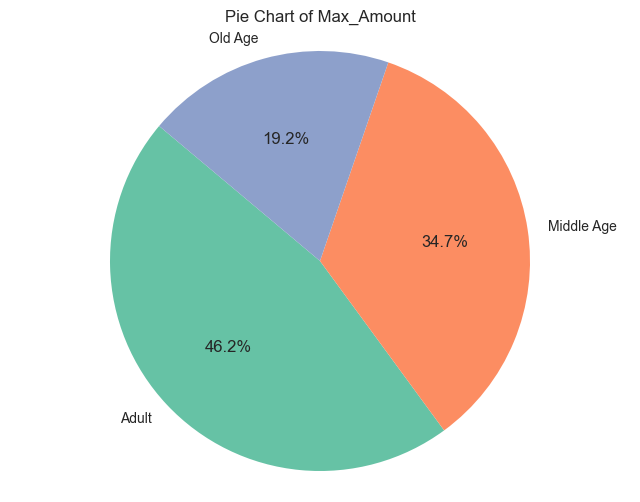

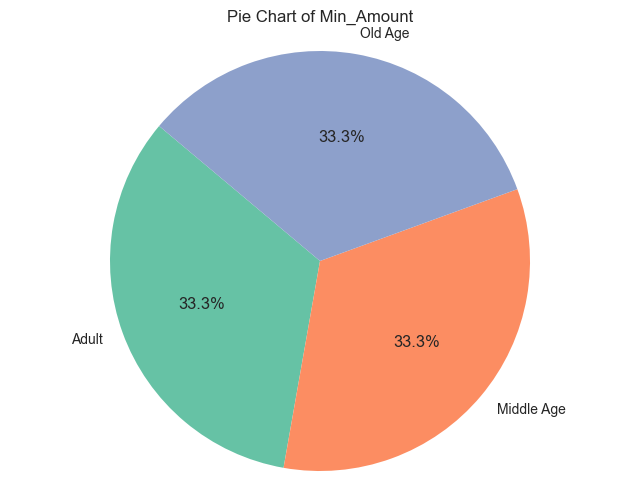

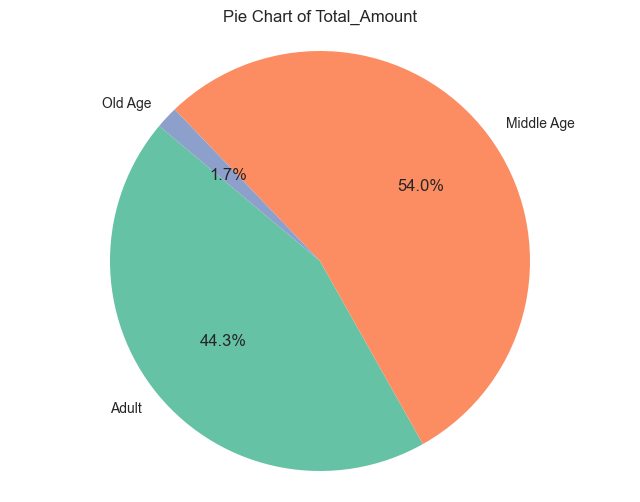

In [25]:
# Function to plot pie charts
def plot_pie_chart(column_name):
    plt.figure(figsize=(8, 6))
    plt.pie(merged_min_max_total[column_name], labels=merged_min_max_total['Age_group'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
    plt.title(f'Pie Chart of {column_name}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plotting pie charts for each column
plot_pie_chart('Max_Amount')
plot_pie_chart('Min_Amount')
plot_pie_chart('Total_Amount')

* Analysis of Max_Amount

The Max_Amount pie chart highlights the highest single transaction amounts contributed by each age group. The Adult group leads with 46.2%, showing that this demographic makes the largest individual contributions. This suggests that while they may not contribute the most frequently, their individual transactions are substantial. The Middle Age group follows with 34.7%, indicating significant but lower individual contributions compared to Adults. The Old Age group trails with 19.2%, reflecting that their highest single transactions are considerably smaller. This distribution underscores a trend where older individuals might engage in less financially intensive activities or have different spending habits compared to younger age groups.

* Analysis of Total_Amount

The Total_Amount pie chart provides insight into the overall contribution volumes of each age group. The Middle Age group dominates with 54.0%, revealing that they contribute the most in aggregate. This suggests that, despite not having the highest single transactions, they are the most consistent or frequent contributors overall. Adults, contributing 44.3%, follow closely behind, indicating substantial overall engagement but slightly less than the Middle Age group. The Old Age group contributes only 1.7%, which is minimal compared to the other groups. This large discrepancy suggests that older individuals contribute less both in terms of frequency and transaction size.

* Analysis of Min_Amount

The Min_Amount pie chart demonstrates that the minimum contribution amount is uniformly distributed among all age groups, each with a 33.3% share. This indicates that the smallest possible contribution is the same across all demographics, reflecting a standardization of the minimum contribution level irrespective of age. This uniformity suggests that all age groups are subject to the same baseline requirements for contributions, which may be designed to ensure equality in the smallest possible engagement level.

### Univariate Analysis 


Univariate analysis helps in understanding the central tendency, dispersion, and shape of the data distribution for a single variable, 
providing a foundational understanding before moving on to more complex analyses.

Quantity
Skew : 31.78


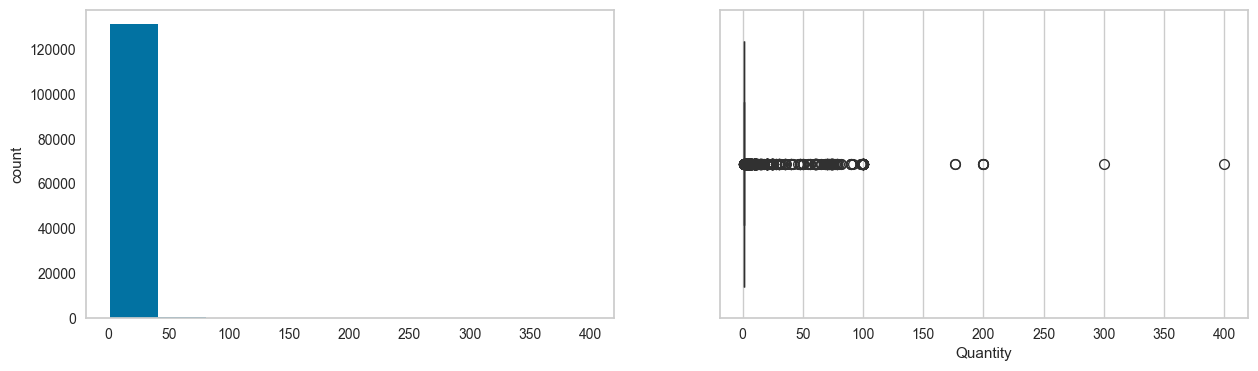

Sales_Amount
Skew : 7.43


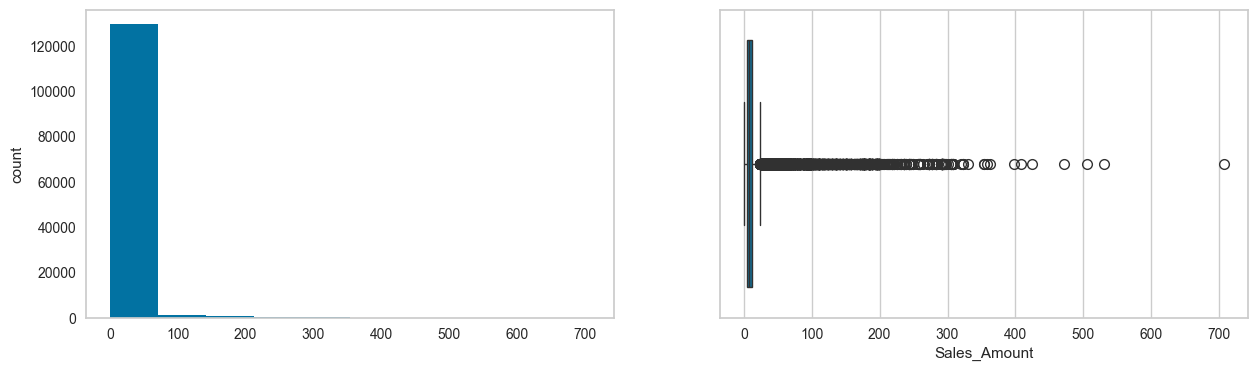

AGE
Skew : 0.02


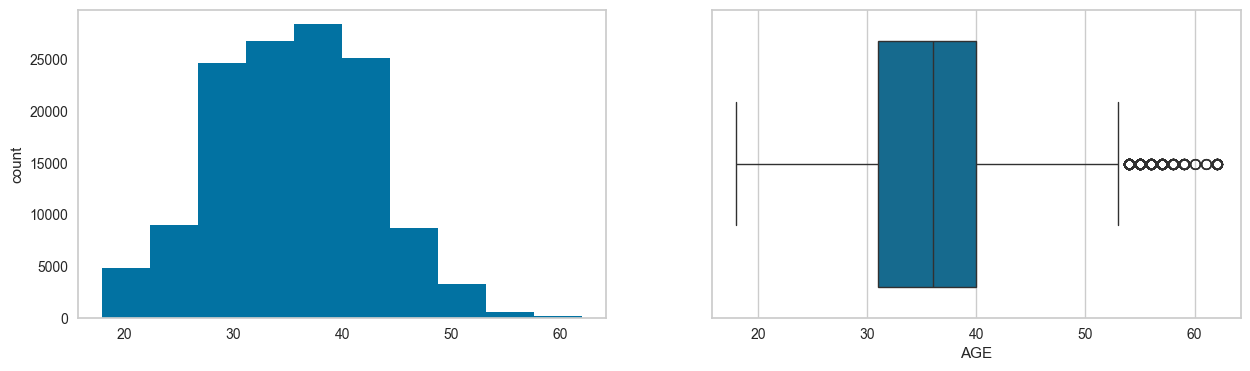

In [26]:
#Analyzing/visualizing the dataset by taking one variable at a time.
for col in num_cols:
    print(col)
    print('Skew :', round(merged_df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    merged_df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=merged_df[col])
    plt.show()

### Bivariate Analysis


Bivariate analysis is a statistical method that involves the analysis of two variables to determine the relationship between them. This type of analysis helps in understanding how the two variables are related and the nature and strength of their association. 

In [27]:
merged_df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Age_group
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Middle Age
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Adult
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Middle Age
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Adult
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Adult


**Analysis of the relationship between Location and Sales_Amount**

Text(0, 0.5, 'Sum of Sales_Amount')

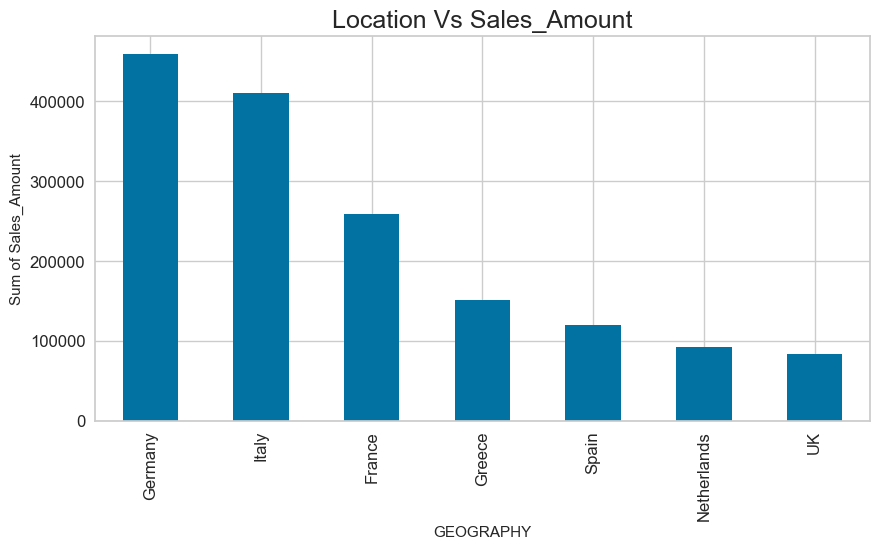

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))
mn = merged_df.groupby('GEOGRAPHY')['Sales_Amount'].sum()
merged_df.groupby('GEOGRAPHY')['Sales_Amount'].sum().sort_values(ascending=False).plot.bar(fontsize=12)
ax.set_title("Location Vs Sales_Amount", fontsize=18)
ax.set_ylabel('Sum of Sales_Amount')


The bar chart illustrates the total sales amounts for various European countries, with the x-axis representing the countries and the y-axis depicting the sum of sales amounts. Germany leads with the highest sales, surpassing 400,000, followed closely by Italy, which also approaches the 400,000 mark. France comes next with a significant drop, achieving around 250,000. Greece, Spain, the Netherlands, and the UK follow, with each country exhibiting lower sales figures. Greece and Spain have comparable sales figures, each around 150,000, while the Netherlands and the UK trail behind, each with sales close to 100,000. This chart underscores the dominant market presence of Germany and Italy, contrasting with the more modest sales performance of the Netherlands and the UK.

**Analysis of Sales_Amount according to each country and gender**

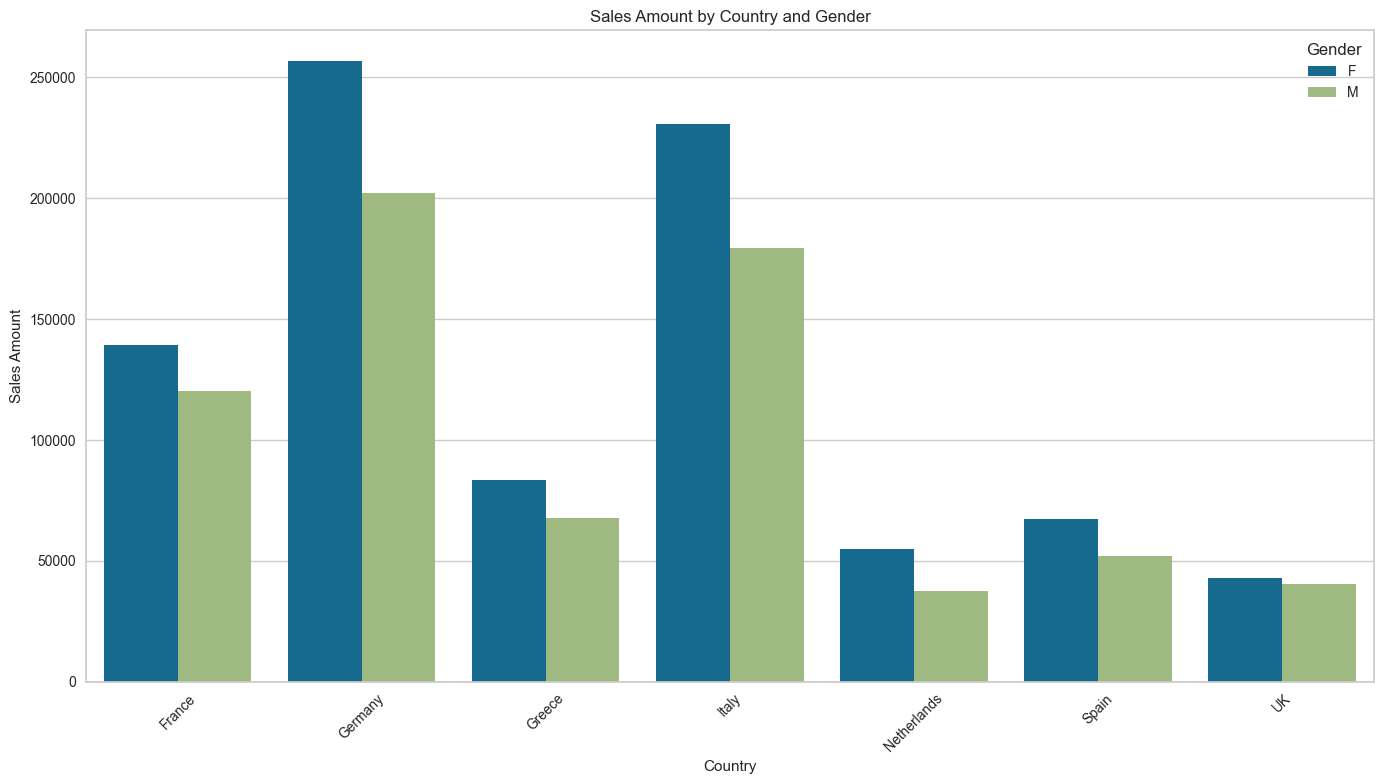

In [29]:
# Group by GEOGRAPHY and GENDER and aggregate the sales amount
grouped_data = merged_df.groupby(['GEOGRAPHY', 'GENDER'])['Sales_Amount'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='GEOGRAPHY', y='Sales_Amount', hue='GENDER', data=grouped_data, ci=None)

# Customize the plot
plt.title('Sales Amount by Country and Gender')
plt.xlabel('Country')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()

The chart presents the sales amounts by country and gender, comparing female (F) and male (M) sales across various European countries. Germany and Italy dominate the sales figures, with Germany showing higher sales for females (over 250,000) compared to males (around 220,000), while Italy has slightly higher female sales as well (approximately 230,000) compared to male sales (around 200,000). In France, female sales (around 150,000) surpass male sales (about 120,000). Greece shows a relatively balanced gender distribution in sales, both around 80,000. The Netherlands and the UK have the lowest sales figures, with females and males both under 100,000. In Spain, female sales are higher (around 100,000) compared to male sales (around 80,000). Overall, female sales consistently outpace male sales in these countries, with notable differences in Germany, Italy, and France.

**Analysis of the relationship between Age and Sales_Amount**

Text(0, 0.5, 'Sum of Sales_Amount')

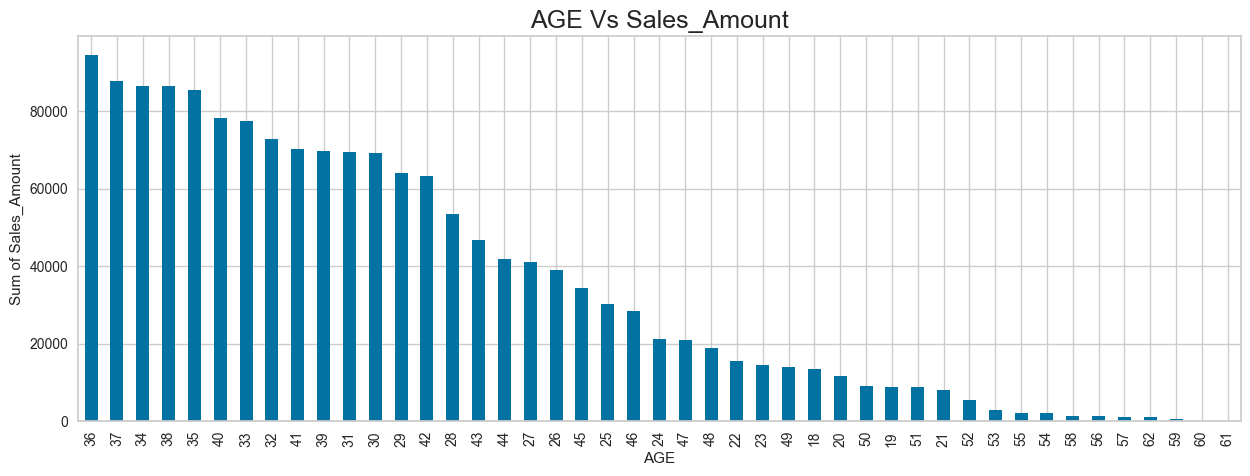

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
label = merged_df.groupby('AGE')['Sales_Amount'].sum().sort_values(ascending=False)
merged_df.groupby('AGE')['Sales_Amount'].sum().sort_values(ascending=False).plot(kind='bar')
ax.set_title("AGE Vs Sales_Amount", fontsize=18)
ax.set_ylabel('Sum of Sales_Amount')

The graph titled "AGE Vs Sales_Amount" displays a bar chart representing the sum of sales amounts across various age groups. From the chart, it is evident that the age group 36 has the highest sum of sales, followed closely by the ages 37, 34, and 38, each contributing significantly to the total sales amount. As the age increases or decreases from this peak range, there is a notable decline in sales. This trend suggests that individuals around the mid-30s are the most significant contributors to sales, with a gradual decrease in purchasing behavior as age diverges from this central age group. Notably, the sales amount drops sharply after age 50, with minimal contributions from ages above 55 and below 20. This pattern may reflect specific consumer behavior or market segmentation that highly targets the 30-40 age demographic.

**Relationship between Age and Quantity**

Text(0, 0.5, 'Sum of Quantity')

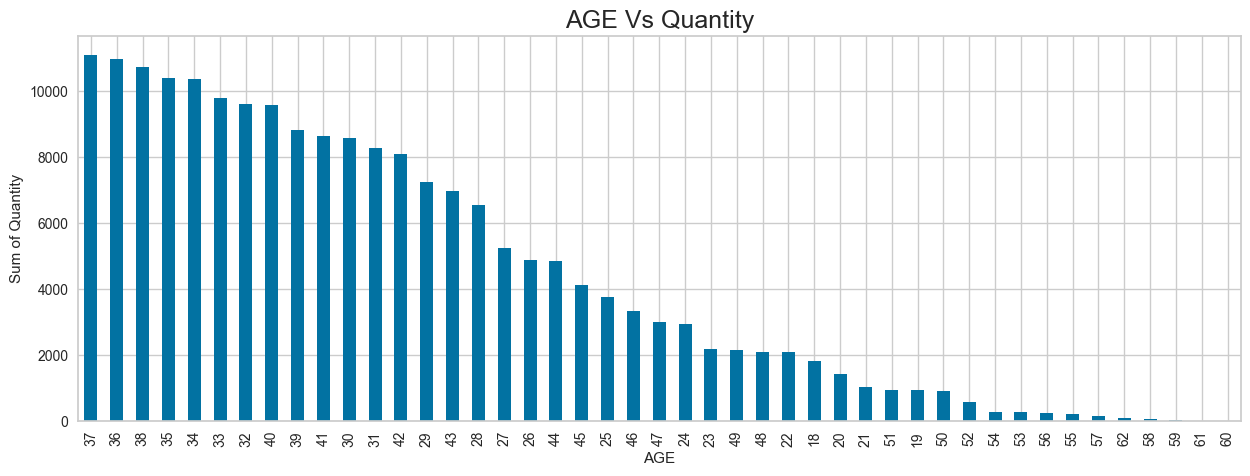

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
label = merged_df.groupby('AGE')['Quantity'].sum().sort_values(ascending=False)
merged_df.groupby('AGE')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
ax.set_title("AGE Vs Quantity", fontsize=18)
ax.set_ylabel('Sum of Quantity')

The graph titled "AGE Vs Quantity" is a bar chart showing the sum of quantities purchased across different age groups. The highest quantity of purchases is made by the age group 37, closely followed by ages 36, 38, and 35, indicating that individuals in their mid to late 30s are the most active purchasers in terms of quantity. Similar to the sales amount graph, there is a noticeable decline in quantity purchased as the age moves away from this peak range. The quantities start to diminish significantly after the age of 44, with very minimal purchases by individuals above 50 and those younger than 21. This trend suggests that mid to late 30s is the prime purchasing age group both in terms of the amount spent and the quantity purchased, with a gradual decrease in purchasing activity as individuals age or are younger. The correlation between age and purchasing behavior indicates targeted marketing strategies could be highly effective if focused on this age demographic.

**Sales Trend for each Country**

In [32]:
# Extract month and year from 'InvoiceDate' and convert to string for plotting
merged_df['YearMonth'] = merged_df['Date'].dt.strftime('%b\'%Y')  # Format like Jan'2011
 
# Group by 'Region' and 'YearMonth', summing 'Sales_amount'
Country_monthly_sales = merged_df.groupby(['GEOGRAPHY', 'YearMonth'])['Sales_Amount'].sum().reset_index()
 
# Get unique regions
Country = Country_monthly_sales['GEOGRAPHY'].unique()
 
# Extract only 'YearMonth' values to ensure proper ordering
year_months = Country_monthly_sales['YearMonth'].unique()
 
# Sort 'YearMonth' values chronologically (Dec'2010, Jan'2011, Feb'2011, etc.)
sorted_months = sorted(year_months, key=lambda x: pd.to_datetime(x, format='%b\'%Y'))
 
# Create a mapping dictionary to ensure proper order in Plotly
month_order = {month: idx for idx, month in enumerate(sorted_months)}
 
# Assign a numerical index to each 'YearMonth' based on the sorted order
Country_monthly_sales['MonthIndex'] = Country_monthly_sales['YearMonth'].map(month_order)
 
# Sort data by 'MonthIndex' to ensure it's plotted in ascending order
Country_monthly_sales = Country_monthly_sales.sort_values(by='MonthIndex')
 
# Plot using Plotly
fig = go.Figure()
 
# Colors for different regions
colors = ['green', 'blue', 'red', 'orange', 'purple', 'brown', 'pink']
 
for idx, Country in enumerate(Country):
    # Filter data for the current region
    data = Country_monthly_sales[Country_monthly_sales['GEOGRAPHY'] == Country]
   
    # Plot each region with a different color
    fig.add_trace(go.Scatter(x=data['YearMonth'], y=data['Sales_Amount'],
                             mode='lines+markers',
                             name=Country,
                             line=dict(color=colors[idx % len(colors)], width=2),  # Line color
                             marker=dict(color=colors[idx % len(colors)], size=8, line=dict(color='black', width=1)),  # Marker color with black borders
                             ))
 
# Customize layout
fig.update_layout(title='Sales Trend for All Country',
                  title_font_color='white',  # Title font color
                  title_x=0.5,  # Title center alignment
                  xaxis_title='Month',
                  yaxis_title='Sales Amount',
                  xaxis=dict(tickangle=-45, categoryorder='array', categoryarray=sorted_months),  # Ensure x-axis is in correct order
                  plot_bgcolor='black',  # Black background
                  paper_bgcolor='black',  # Black background
                  font=dict(color='white'),  # White text color
                  legend=dict(font=dict(color='white')),  # White legend text color
                  )
 
 
plt.tight_layout()
 
fig.show()

<Figure size 800x550 with 0 Axes>

The chart depicts the sales trends for various European countries from January 2021 to December 2021, with distinct colors representing each country. France, in green, shows a consistent performance with slight fluctuations around the 20k sales mark. Germany, highlighted in blue, demonstrates the highest sales, peaking above 40k in May and generally maintaining strong figures. Greece, marked in red, indicates lower sales around the 10k range with minimal variation. Italy, in orange, also shows high sales, closely trailing Germany, particularly notable around May and maintaining stability. The Netherlands, depicted in purple, shows low sales of around 10k. Spain, represented by brown, displays a steady but lower sales trend close to the 10k mark. The UK, in pink, shows the lowest sales among the countries, remaining consistently below 10k throughout the year, similar to Netherlands. Overall, Germany and Italy lead in sales, while the UK and Netherlands have the lowest sales figures, with other countries displaying moderate and stable trends.

**Heatmap of Sales_Amount by Country and Age Group**

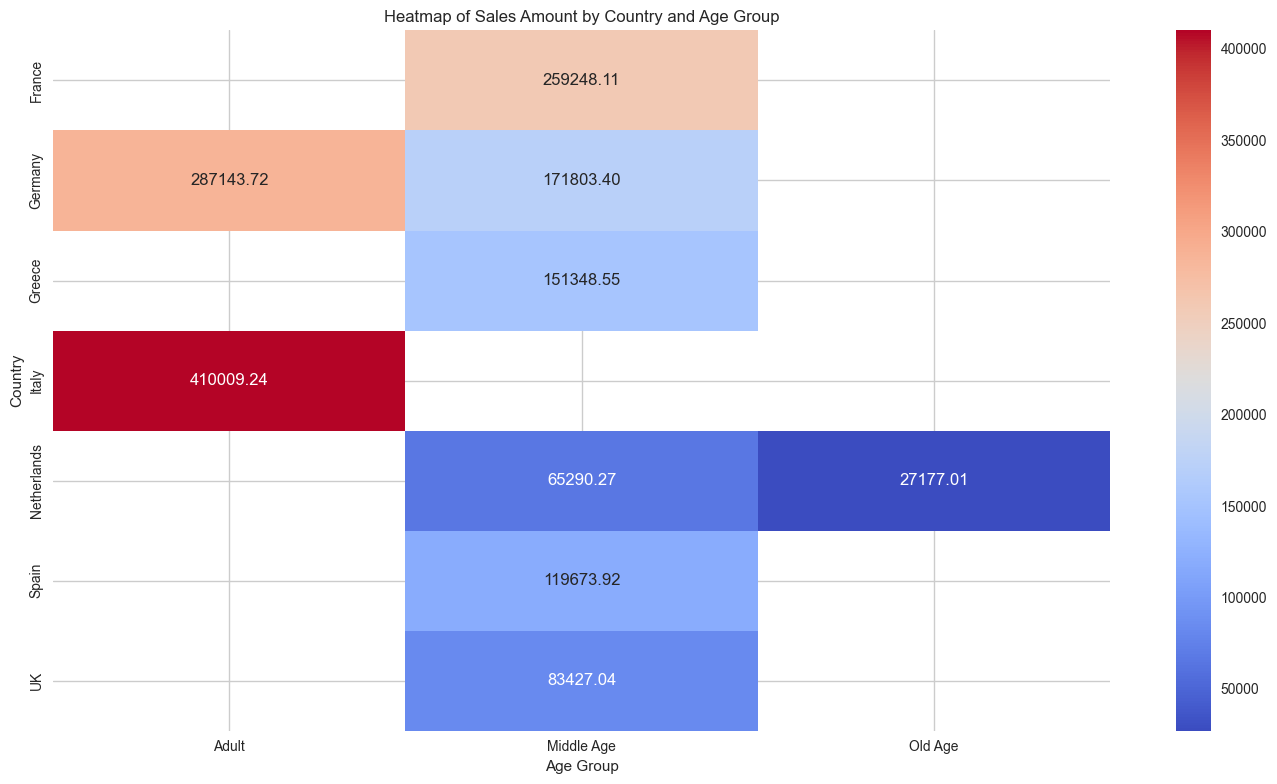

In [33]:
# Pivot the data
heatmap_data = merged_df.pivot_table(values='Sales_Amount', index='GEOGRAPHY', columns='Age_group', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm')

# Customize the plot
plt.title('Heatmap of Sales Amount by Country and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Country')

# Show the plot
plt.tight_layout()
plt.show()


The heatmap titled "Heatmap of Sales Amount by Country and Age Group" illustrates the sales amounts across different countries and age groups. The data is color-coded, with warmer colors (reds) indicating higher sales amounts and cooler colors (blues) indicating lower sales amounts. Italy stands out significantly in the "Adult" age group, contributing the highest sales amount of 410,009.24, followed by Germany with 287,143.72. In the "Middle Age" group, the sales amounts are more evenly distributed, with the Netherlands and Spain having noticeable contributions of 65,290.27 and 119,673.92, respectively. The "Old Age" group shows the lowest sales amounts across all countries, with Italy still contributing the highest within this group at 27,177.01. France, Greece, and the UK show moderate sales amounts in both the adult and middle age groups but minimal in the old age group. This heatmap effectively highlights the concentration of sales in specific age groups and countries, with Italy and the adult age group being the most significant contributors to overall sales.

# RFM Calculation

RFM (Recency, Frequency, Monetary) scoring is a technique used in customer segmentation to analyze and classify customers based on their purchasing behavior. The RFM score helps businesses understand their customers' value and loyalty, allowing for targeted marketing and personalized engagement.

**Calculate the most recent date**

In [34]:
#Calculate the most recent date
max_date = max(merged_df['Date'])
max_date

min_date = min(merged_df['Date'])
max_date ,min_date



(Timestamp('2021-12-31 00:00:00'), Timestamp('2021-01-02 00:00:00'))

**Calculate reference date that’s a day later than the most recent date in the “Date” column**

In [35]:
#Calculate reference date that’s a day later than the most recent date in the “Date” column
ref_date = max_date + pd.DateOffset(days=1)
ref_date

Timestamp('2022-01-01 00:00:00')

In [36]:
merged_df

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Age_group,YearMonth
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Middle Age,Jan'2021
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Adult,Jan'2021
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Middle Age,Jan'2021
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Adult,Jan'2021
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Adult,Jan'2021
...,...,...,...,...,...,...,...,...,...,...,...,...
105465,2021-12-31,20506,64602,0H2,549KK,1.0,5.71,M,35,Germany,Middle Age,Dec'2021
94500,2021-12-31,10134,64603,0H2,CZUZX,1.0,6.54,F,28,Italy,Adult,Dec'2021
54479,2021-12-31,17926,64620,P42,VVOG7,1.0,6.54,M,47,Netherlands,Middle Age,Dec'2021
39708,2021-12-31,17061,64635,Q4N,G5878,1.0,7.23,F,29,Italy,Adult,Dec'2021


**Creating RFM dataframe according to the key components**

**Key Components of RFM Scoring**

Recency (R): How recently a customer has made a purchase.  Compute the number of days since the customer’s last purchase.

Frequency (F): How often a customer makes a purchase. Count the total number of purchases made by the customer.

Monetary (M): How much money a customer spends.  Sum the total amount spent by the customer.

In [37]:
rfm  = pd.DataFrame()
rfm = merged_df.groupby('Customer_ID').agg({
    'Date': lambda x: (ref_date - x.max()).days,
    'Transaction_ID': 'nunique',
    'Sales_Amount': 'sum'
})
# Rename the columns
rfm.rename(columns={'Date':'Recency', 'Transaction_ID':'Frequency', 'Sales_Amount':'Monetary'}, inplace=True)
rfm

,Recency,Frequency,Monetary
Customer_ID,,,
1,344,1,16.29
2,196,2,22.77
3,364,1,10.92
4,53,2,33.29
5,180,5,78.82
...,...,...,...
22621,22,1,9.69
22622,16,1,6.07
22623,11,1,128.01


**Sort the dataframe by date**

In [38]:
#Sort the dataframe by date
rfm_df = rfm.sort_values(by=['Recency'])
rfm_df

,Recency,Frequency,Monetary
Customer_ID,,,
22625,1,4,83.62
17912,1,23,844.54
17914,1,10,181.93
9348,1,1,50.11
11681,1,3,25.20
...,...,...,...
3992,364,1,26.19
1614,364,1,5.32
9223,364,1,12.12


**Creating copies of rfm dataframe that will be used for each scaling method**

In [39]:
rfm_New = rfm_df.copy()
Norm_df = rfm_df.copy()
stand_df = rfm_df.copy()
Hr_df = rfm_df.copy()

In [40]:
#Checking if rfm is calculated correcly.
merged_df[merged_df['Customer_ID'] == 5]

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Age_group,YearMonth
26355,2021-02-09,5,6370,P42,DMJ70,4.0,20.13,M,35,Germany,Middle Age,Feb'2021
26356,2021-02-22,5,8624,P42,DMJ70,4.0,20.13,M,35,Germany,Middle Age,Feb'2021
26357,2021-03-23,5,14133,P42,DMJ70,3.0,17.17,M,35,Germany,Middle Age,Mar'2021
26358,2021-05-28,5,26651,P42,DMJ70,2.0,14.33,M,35,Germany,Middle Age,May'2021
26359,2021-07-05,5,33043,LGI,EIFZN,1.0,7.06,M,35,Germany,Middle Age,Jul'2021


**Statistical information for rfm dataframe**

In [41]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,22600.000000,22600.000000,22600.000000
mean,161.969159,2.856106,69.695631
std,115.696597,3.996891,152.318127
min,1.000000,1.000000,0.140000
25%,48.000000,1.000000,10.140000
50%,150.000000,1.000000,23.810000
75%,272.000000,3.000000,63.052500
max,364.000000,99.000000,3985.940000


**Plot the distribution of each feature of rfm dataframe**

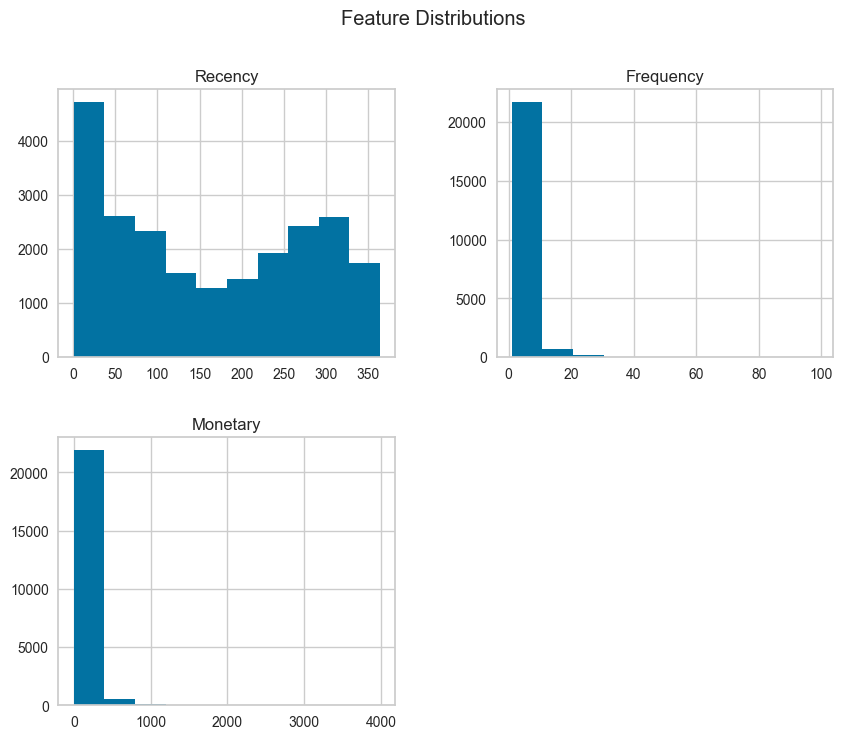

In [42]:
# Plot the distribution of each feature
rfm_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()

* Recency

The "Recency" graph shows the distribution of the recency feature, which measures the number of days since a customer's last purchase. The x-axis represents the number of days, while the y-axis represents the frequency of customers with that recency value. The distribution appears to be somewhat bimodal, with a peak at around 0-50 days indicating a large number of customers who have made recent purchases. Another smaller peak occurs around 250-300 days, suggesting a group of customers who made purchases a while back but not recently. This indicates two distinct customer segments in terms of recency.

* Frequency

The "Frequency" graph displays the distribution of the frequency feature, which represents the number of purchases made by a customer. The x-axis shows the number of purchases, and the y-axis shows the frequency of customers. The distribution is heavily right-skewed, with the majority of customers making very few purchases. Most customers have made between 0 to 10 purchases, with very few customers having made more than 20 purchases. This suggests that a small number of customers are highly frequent purchasers, while the majority have low purchasing frequency.

* Monetary

The "Monetary" graph illustrates the distribution of the monetary feature, which measures the total amount of money spent by a customer. The x-axis indicates the amount spent, and the y-axis indicates the frequency of customers within those spending ranges. Similar to the frequency distribution, the monetary distribution is highly right-skewed, with most customers spending relatively small amounts. The majority of customers have spent less than $1000, while a very small number of customers have spent amounts approaching or exceeding $4000. This implies that the bulk of revenue comes from a small number of high-spending customers.

## K-Means Model

K-means is a popular clustering algorithm used in unsupervised machine learning to partition a dataset into distinct groups based on similarity. Each group, or cluster, is characterized by its centroid, which represents the average of all data points in the cluster. The goal of K-means is to minimize the variance within each cluster.

Key Concepts in K-means
Centroid: The center of a cluster, which is the mean of all points assigned to that cluster.
Cluster: A group of data points that are more similar to each other than to points in other clusters.
Iteration: The process involves iterating between assigning data points to the nearest centroid and recalculating centroids based on these assignments.

Steps in K-means Clustering
Initialize Centroids: Select k initial centroids randomly or using some heuristic method.
Assign Clusters: Assign each data point to the nearest centroid, forming k clusters.
Update Centroids: Recalculate the centroid of each cluster by averaging the data points assigned to it.
Repeat: Repeat the assignment and update steps until the centroids no longer change significantly or a maximum number of iterations is reached.

**Feature Scaling Techniques** that we used for dat processing include Min Max scaling and Standard Scaling

### Min Max Scaler

Min-Max Scaling (or normalization) transforms features to be within a specific range, typically [0, 1]. This is achieved by rescaling each feature to a range between the minimum and maximum values of that feature.


In [43]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(rfm_df))
X.columns = ['n_Recency', 'n_Frequency', 'n_Monetary']
X.describe()

,n_Recency,n_Frequency,n_Monetary
count,22600.000000,22600.000000,22600.000000
mean,0.443441,0.018940,0.017451
std,0.318723,0.040785,0.038215
min,0.000000,0.000000,0.000000
25%,0.129477,0.000000,0.002509
50%,0.410468,0.000000,0.005939
75%,0.746556,0.020408,0.015784
max,1.000000,1.000000,1.000000


**Elbow method used to identify the optimal number of clusters**

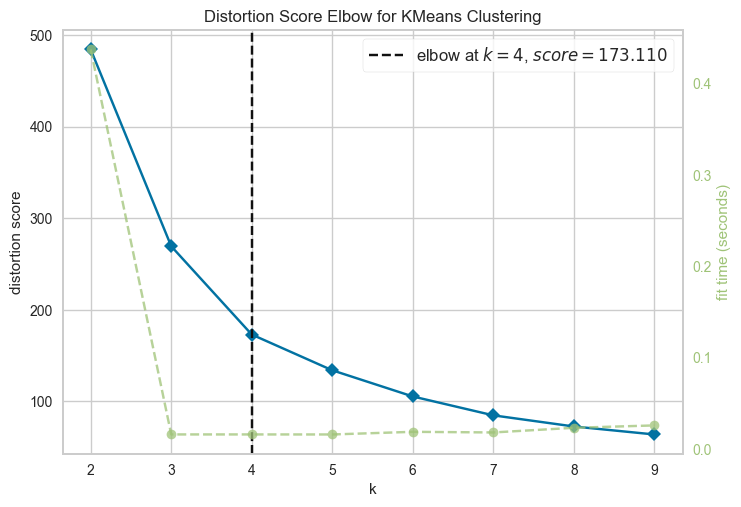

Optimal number of clusters: 4


In [44]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10))  # Search for optimal k from 2 to 10
visualizer.fit(X)
 
#Save the image below
plt.savefig("Elbow Graph.png",dpi = 300,bbox_inches ="tight")
 
visualizer.show()
 
print("Optimal number of clusters:", visualizer.elbow_value_)

The graph illustrates the "elbow method" used to determine the optimal number of clusters (k) for KMeans clustering. The x-axis represents the number of clusters (k), and the y-axis on the left represents the distortion score, which measures the sum of squared distances from each point to its assigned cluster center. The distortion score decreases as k increases, indicating better clustering. However, after a certain point, the rate of improvement slows down, forming an "elbow" in the graph. In this case, the elbow is at k=4, with a distortion score of 173.110, suggesting that four clusters are optimal. The green line and right y-axis show the fit time in seconds for each k, indicating the computational time required for clustering.

**Perform K-means clustering with best K**

In [45]:
# Perform K-means clustering with best K 
best_k = visualizer.elbow_value_
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
rfm_df['Cluster'] = best_kmeans.fit_predict(X)

# Print the first few rows to verify
print(rfm_df.head(10))

             Recency  Frequency  Monetary  Cluster
Customer_ID                                       
22625              1          4     83.62        1
17912              1         23    844.54        1
17914              1         10    181.93        1
9348               1          1     50.11        1
11681              1          3     25.20        1
17926              1         33   1515.32        1
16444              1          5     42.38        1
22178              1          2     54.32        1
13409              1         22    552.73        1
16350              1          3     70.59        1


**Calculation of silhouette_score**

In [46]:
#Calculation of silhouette_score
from sklearn.metrics import silhouette_score
ss_mm = silhouette_score(X, best_kmeans.fit_predict(X))
ss_mm 

0.5334032396300445

**Getting the total count for each cluster**

In [47]:
dis_mm = rfm_df['Cluster'].value_counts()
dis_mm

Cluster
1    6932
2    6218
3    4767
0    4683
Name: count, dtype: int64

**Calculate the mean R, F, and M  for each cluster**

In [48]:
# Calculate the mean R, F, and M  for each cluster
cluster_summary = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Print the cluster summary
print(cluster_summary)

   Cluster     Recency  Frequency    Monetary
0        0  218.039932   1.851377   39.446650
1        1   28.263849   4.920081  128.464934
2        2  309.781119   1.823416   43.346790
3        3  108.512272   2.188798   48.320399


**Plotting these characteristics for better visualization**

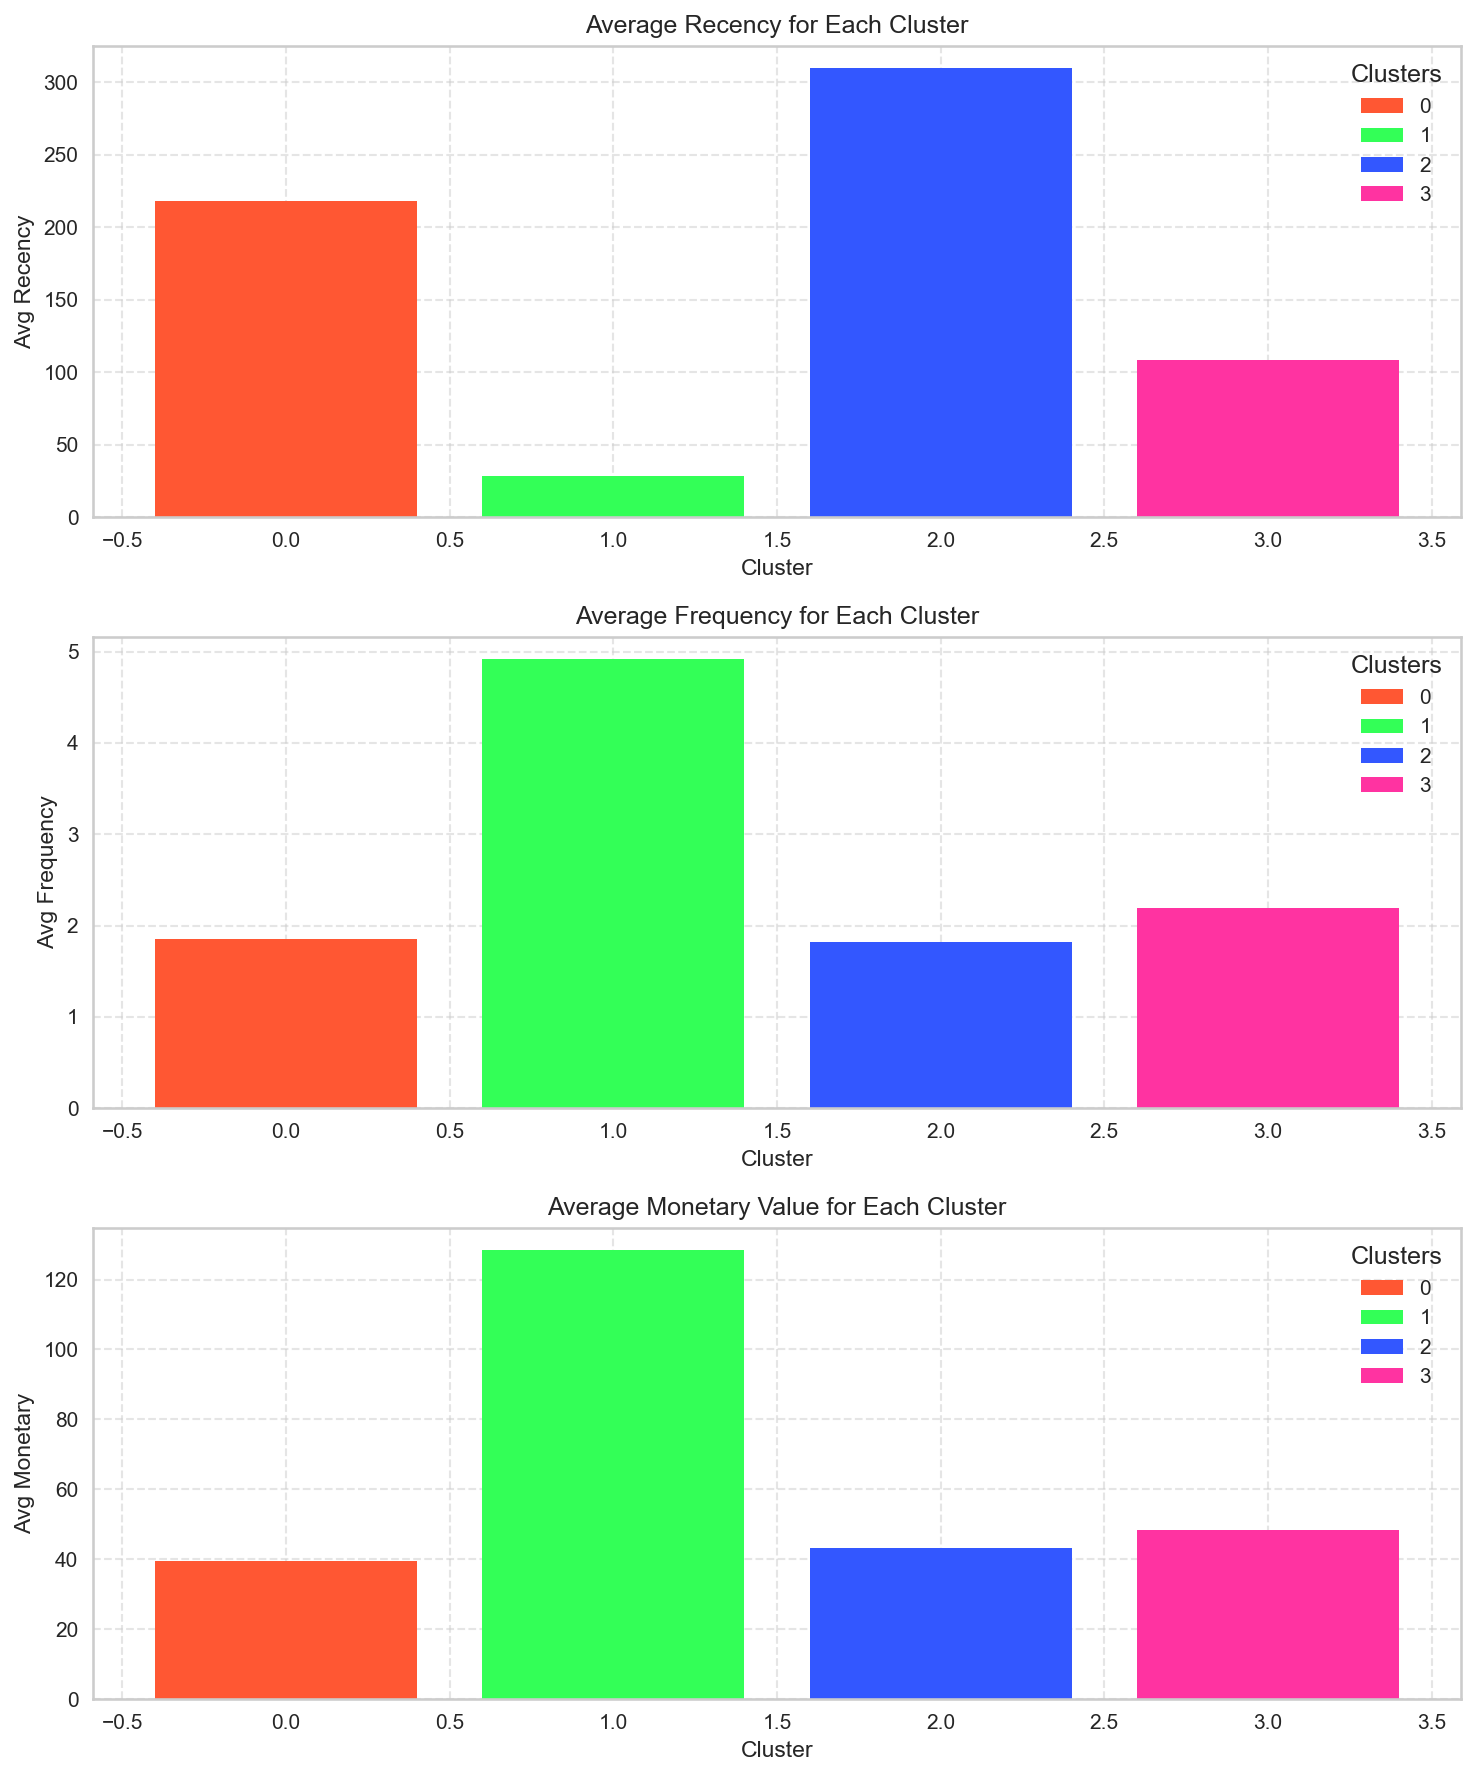

In [49]:
# To make it more insightful, we can plot these characteristics for better visualization
# Colors for each cluster
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF', '#33FFA1', '#FFA133', '#33D1FF', '#FF3333', '#57FF33', '#5733FF', 
          '#33FF57', '#33FFD1', '#FF5733', '#FF33FF', '#D1FF33', '#5733A1', '#33A1FF', '#33FF57', '#FF33D1']# Plot the average RFM scores for each cluster

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 12), dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(cluster_summary['Cluster'], cluster_summary['Recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(cluster_summary['Cluster'], cluster_summary['Frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(cluster_summary['Cluster'], cluster_summary['Monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

plt.tight_layout()
plt.show()

* Average Recency for Each Cluster

The first graph depicts the average recency for each of the four identified clusters. Recency is the number of days since the last purchase. Cluster 1 (blue) has the lowest average recency, indicating that these customers have made purchases most recently. Cluster 2 (green) has the highest average recency, indicating that these customers have not made a purchase in a significant amount of time. Cluster 0 (red) and Cluster 3 (orange) have moderate recency values, suggesting that their purchase history is not as recent as Cluster 1 but more recent than Cluster 2. This information helps in identifying which clusters consist of recently active customers versus those who have not engaged recently.

* Average Frequency for Each Cluster

The second graph shows the average frequency of purchases for each cluster. Cluster 1 (blue) stands out with the highest average frequency, indicating that these customers make purchases more frequently than those in other clusters. Cluster 0 (red) and Cluster 3 (orange) have moderate frequencies, showing that their purchase frequency is less than Cluster 1 but higher than Cluster 2. Cluster 2 (green) has the lowest average frequency, indicating that these customers make purchases the least often. This data helps in understanding the purchasing behavior of different customer segments, with Cluster 1 representing highly frequent shoppers.

* Average Monetary Value for Each Cluster

The third graph illustrates the average monetary value of purchases for each cluster. Cluster 1 (blue) again leads with the highest average monetary value, indicating that these customers spend the most. Cluster 0 (red) and Cluster 3 (orange) have moderate average monetary values, suggesting a mid-range spending behavior. Cluster 2 (green) has the lowest average monetary value, indicating that these customers spend the least. By analyzing these patterns, businesses can identify high-value customers (Cluster 1) and tailor marketing strategies to maximize engagement and revenue from each customer segment.

### Standard Scalar

In [50]:
scaler = StandardScaler()
Y = pd.DataFrame(scaler.fit_transform(stand_df))
Y.columns = ['n_Recency', 'n_Frequency', 'n_Monetary']
Y.describe()

,n_Recency,n_Frequency,n_Monetary
count,2.260000e+04,2.260000e+04,2.260000e+04
mean,8.048626e-17,5.030391e-17,9.054704e-17
std,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.391335e+00,-4.643978e-01,-4.566572e-01
25%,-9.850910e-01,-4.643978e-01,-3.910037e-01
50%,-1.034553e-01,-4.643978e-01,-3.012553e-01
75%,9.510502e-01,3.600223e-02,-4.361449e-02
max,1.746251e+00,2.405520e+01,2.571152e+01


**Perform K-means clustering with best K**

In [51]:
# Perform K-means clustering with best K 
best_k = visualizer.elbow_value_
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
stand_df['Cluster'] = best_kmeans.fit_predict(Y)

# Print the first few rows to verify
print(stand_df.head(10))

             Recency  Frequency  Monetary  Cluster
Customer_ID                                       
22625              1          4     83.62        0
17912              1         23    844.54        3
17914              1         10    181.93        2
9348               1          1     50.11        0
11681              1          3     25.20        0
17926              1         33   1515.32        3
16444              1          5     42.38        0
22178              1          2     54.32        0
13409              1         22    552.73        2
16350              1          3     70.59        0


**Calculation of silhouette_score**

In [52]:
#Calculation of silhouette_score
from sklearn.metrics import silhouette_score
ss_stand = silhouette_score(Y, best_kmeans.fit_predict(Y))
ss_stand

0.5277380118310607

**Getting the total count for each cluster**

In [53]:
dis_stand = stand_df['Cluster'].value_counts()
dis_stand

Cluster
1    10427
0    10238
2     1710
3      225
Name: count, dtype: int64

**Calculate the mean R, F, and M  for each cluster**

In [54]:
# Calculate the mean R, F, and M  for each cluster
Stand_cluster_summary = stand_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Print the cluster summary
print(Stand_cluster_summary)

   Cluster     Recency  Frequency     Monetary
0        0   68.921762   2.251221    41.759435
1        1  273.425530   1.704325    35.294461
2        2   57.865497  10.550292   309.847292
3        3   21.884444  25.280000  1109.928667


**Plotting these characteristics for better visualization**

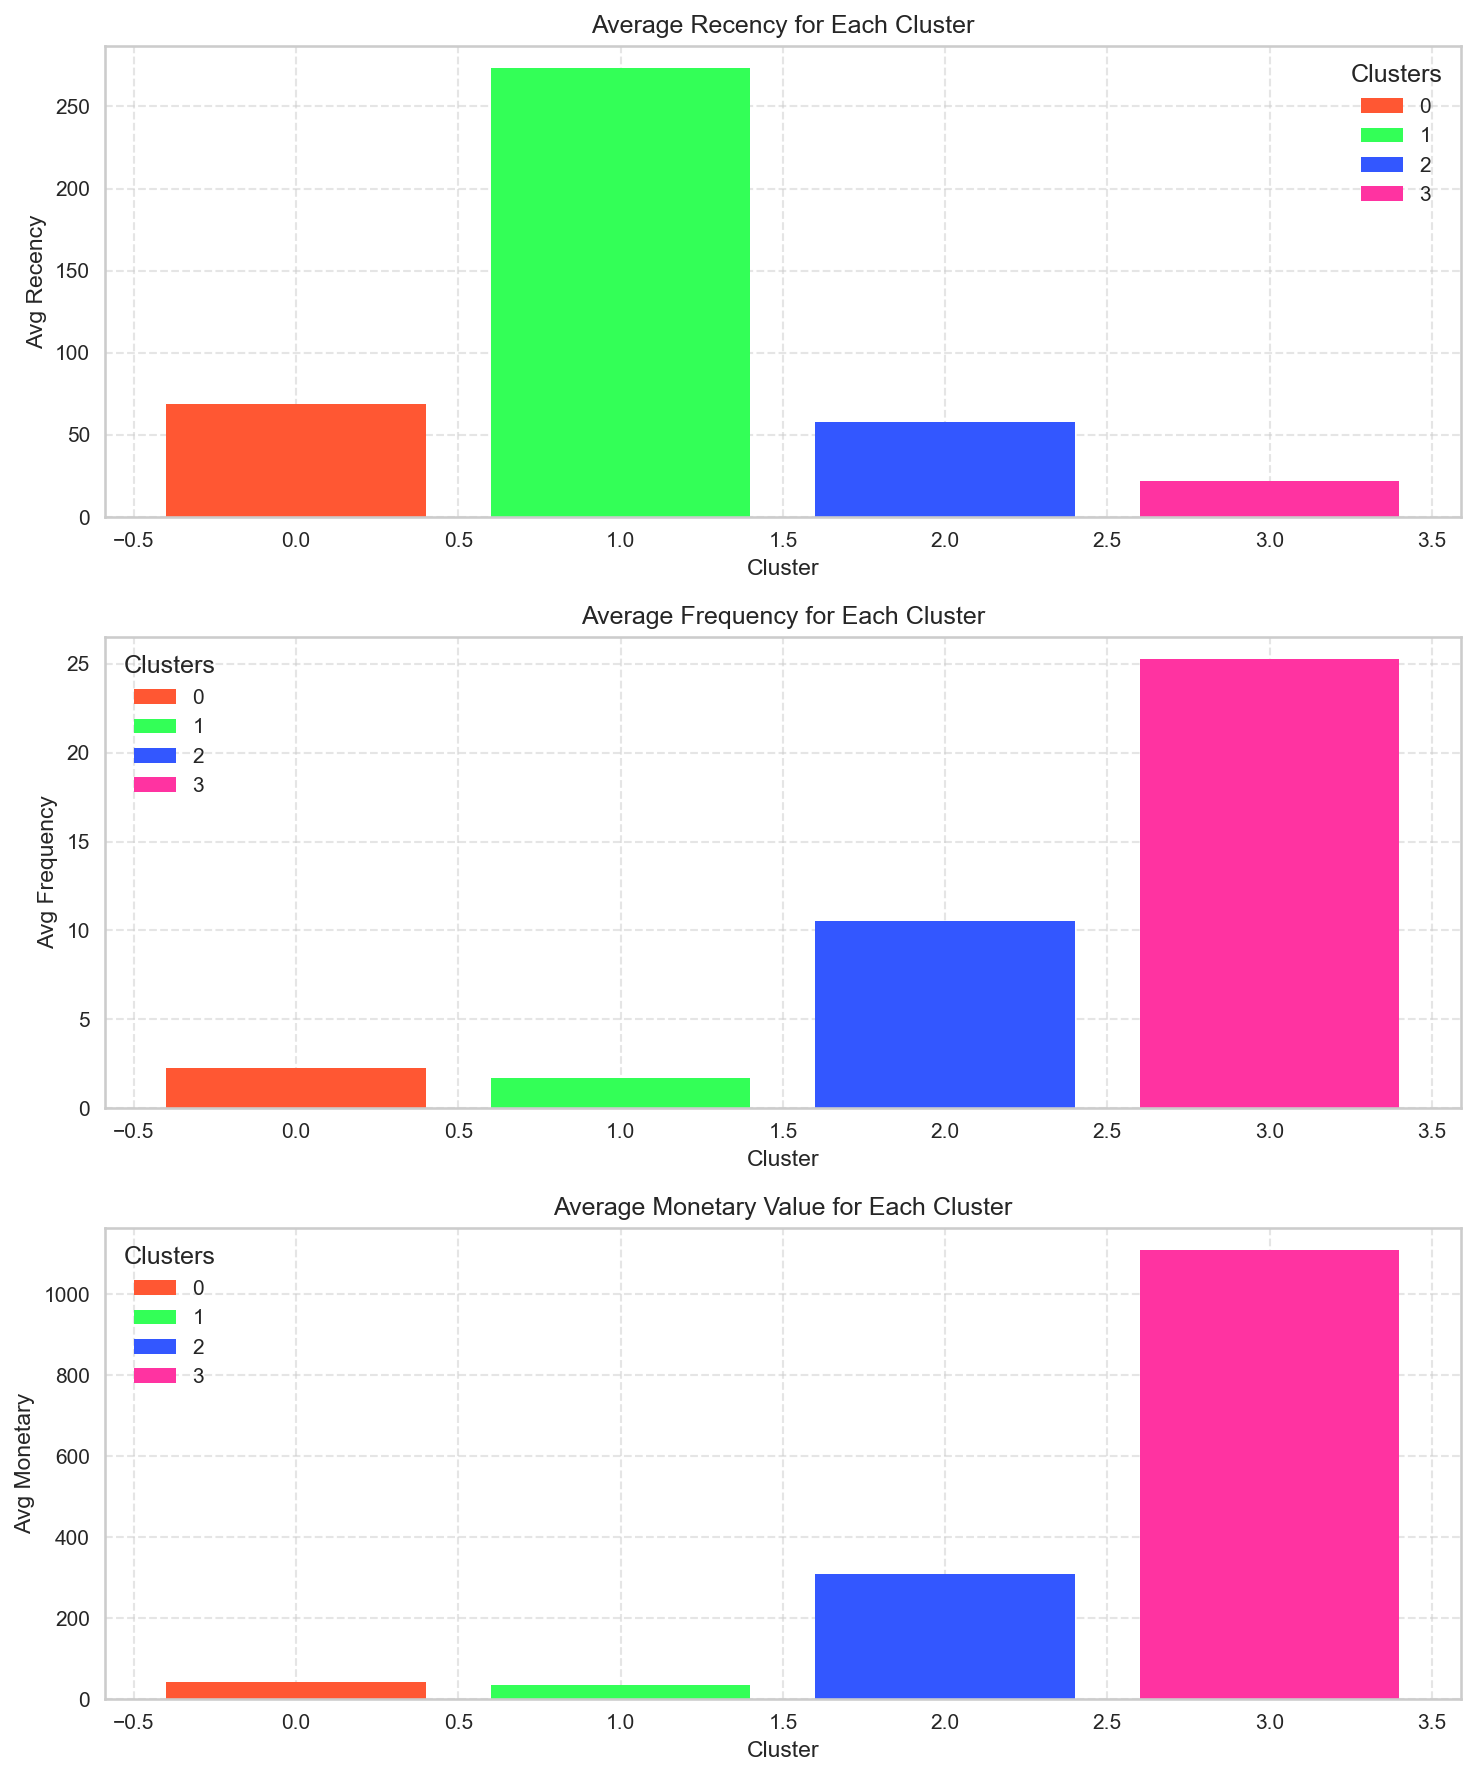

In [55]:
# To make it more insightful, we can plot these characteristics for better visualization

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 12), dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(Stand_cluster_summary['Cluster'], Stand_cluster_summary['Recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Stand_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(Stand_cluster_summary['Cluster'], Stand_cluster_summary['Frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Stand_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(Stand_cluster_summary['Cluster'], Stand_cluster_summary['Monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Stand_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

plt.tight_layout()
plt.show()

**Average Recency for Each Cluster**

The "Average Recency for Each Cluster" chart shows the average number of days since the last purchase for customers in each cluster. Cluster 1 (blue) has the highest recency value, indicating that these customers have not made a purchase in a long time. Cluster 0 (red) follows with a lower recency value, suggesting that these customers are also drifting away but not as much as Cluster 1. Cluster 3 (orange) has the lowest recency, indicating that these customers have made purchases more recently compared to the others. Cluster 2 (green) falls in between, with moderate recency values.

**Average Frequency for Each Cluster**

The "Average Frequency for Each Cluster" chart illustrates how often customers in each cluster make purchases. Cluster 3 (orange) shows the highest frequency, indicating that these customers make purchases more often than those in other clusters. Cluster 2 (green) follows with moderate purchase frequency, suggesting occasional purchasing behavior. Clusters 0 (red) and 1 (blue) show the lowest frequencies, indicating that these customers are less engaged and make purchases infrequently.

**Average Monetary Value for Each Cluster**

The "Average Monetary Value for Each Cluster" chart displays the average amount of money spent by customers in each cluster. Cluster 3 (orange) has the highest average monetary value, signifying that these customers spend significantly more money on their purchases compared to other clusters. Cluster 2 (green) has a moderate monetary value, while Clusters 0 (red) and 1 (blue) have the lowest monetary values. This suggests that customers in Clusters 0 and 1 not only purchase infrequently but also spend less when they do, indicating low engagement and value.

### Normal Data

**Normal data without using any scaling method**

In [56]:
Norm_df.head()

,Recency,Frequency,Monetary
Customer_ID,,,
22625,1,4,83.62
17912,1,23,844.54
17914,1,10,181.93
9348,1,1,50.11
11681,1,3,25.20


**Perform K-means clustering with best K**

In [57]:
# Perform K-means clustering with best K 
best_k = visualizer.elbow_value_
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
Norm_df['Cluster'] = best_kmeans.fit_predict(Norm_df)

# Print the first few rows to verify
print(Norm_df.head(10))

             Recency  Frequency  Monetary  Cluster
Customer_ID                                       
22625              1          4     83.62        0
17912              1         23    844.54        2
17914              1         10    181.93        0
9348               1          1     50.11        0
11681              1          3     25.20        0
17926              1         33   1515.32        3
16444              1          5     42.38        0
22178              1          2     54.32        0
13409              1         22    552.73        2
16350              1          3     70.59        0


**Calculation of silhouette_score**

In [58]:
#Calculation of silhouette_score
from sklearn.metrics import silhouette_score
ss_nor = silhouette_score(Norm_df, best_kmeans.fit_predict(Norm_df))
ss_nor

0.5805093725358085

**Getting the total count for each cluster**

In [59]:
dis_nor = Norm_df['Cluster'].value_counts()
dis_nor

Cluster
0    10686
1    10430
2     1324
3      160
Name: count, dtype: int64

**Calculate the mean R, F, and M  for each cluster**

In [60]:
# Calculate the mean R, F, and M  for each cluster
Norm_cluster_summary = Norm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Print the cluster summary
print(Norm_cluster_summary)

   Cluster     Recency  Frequency     Monetary
0        0   66.352049   2.708497    45.911813
1        1  272.730489   1.741035    33.040105
2        2   77.603474  10.345921   401.598557
3        3   25.868750  23.425000  1301.142750


**Plot these characteristics for better visualization**

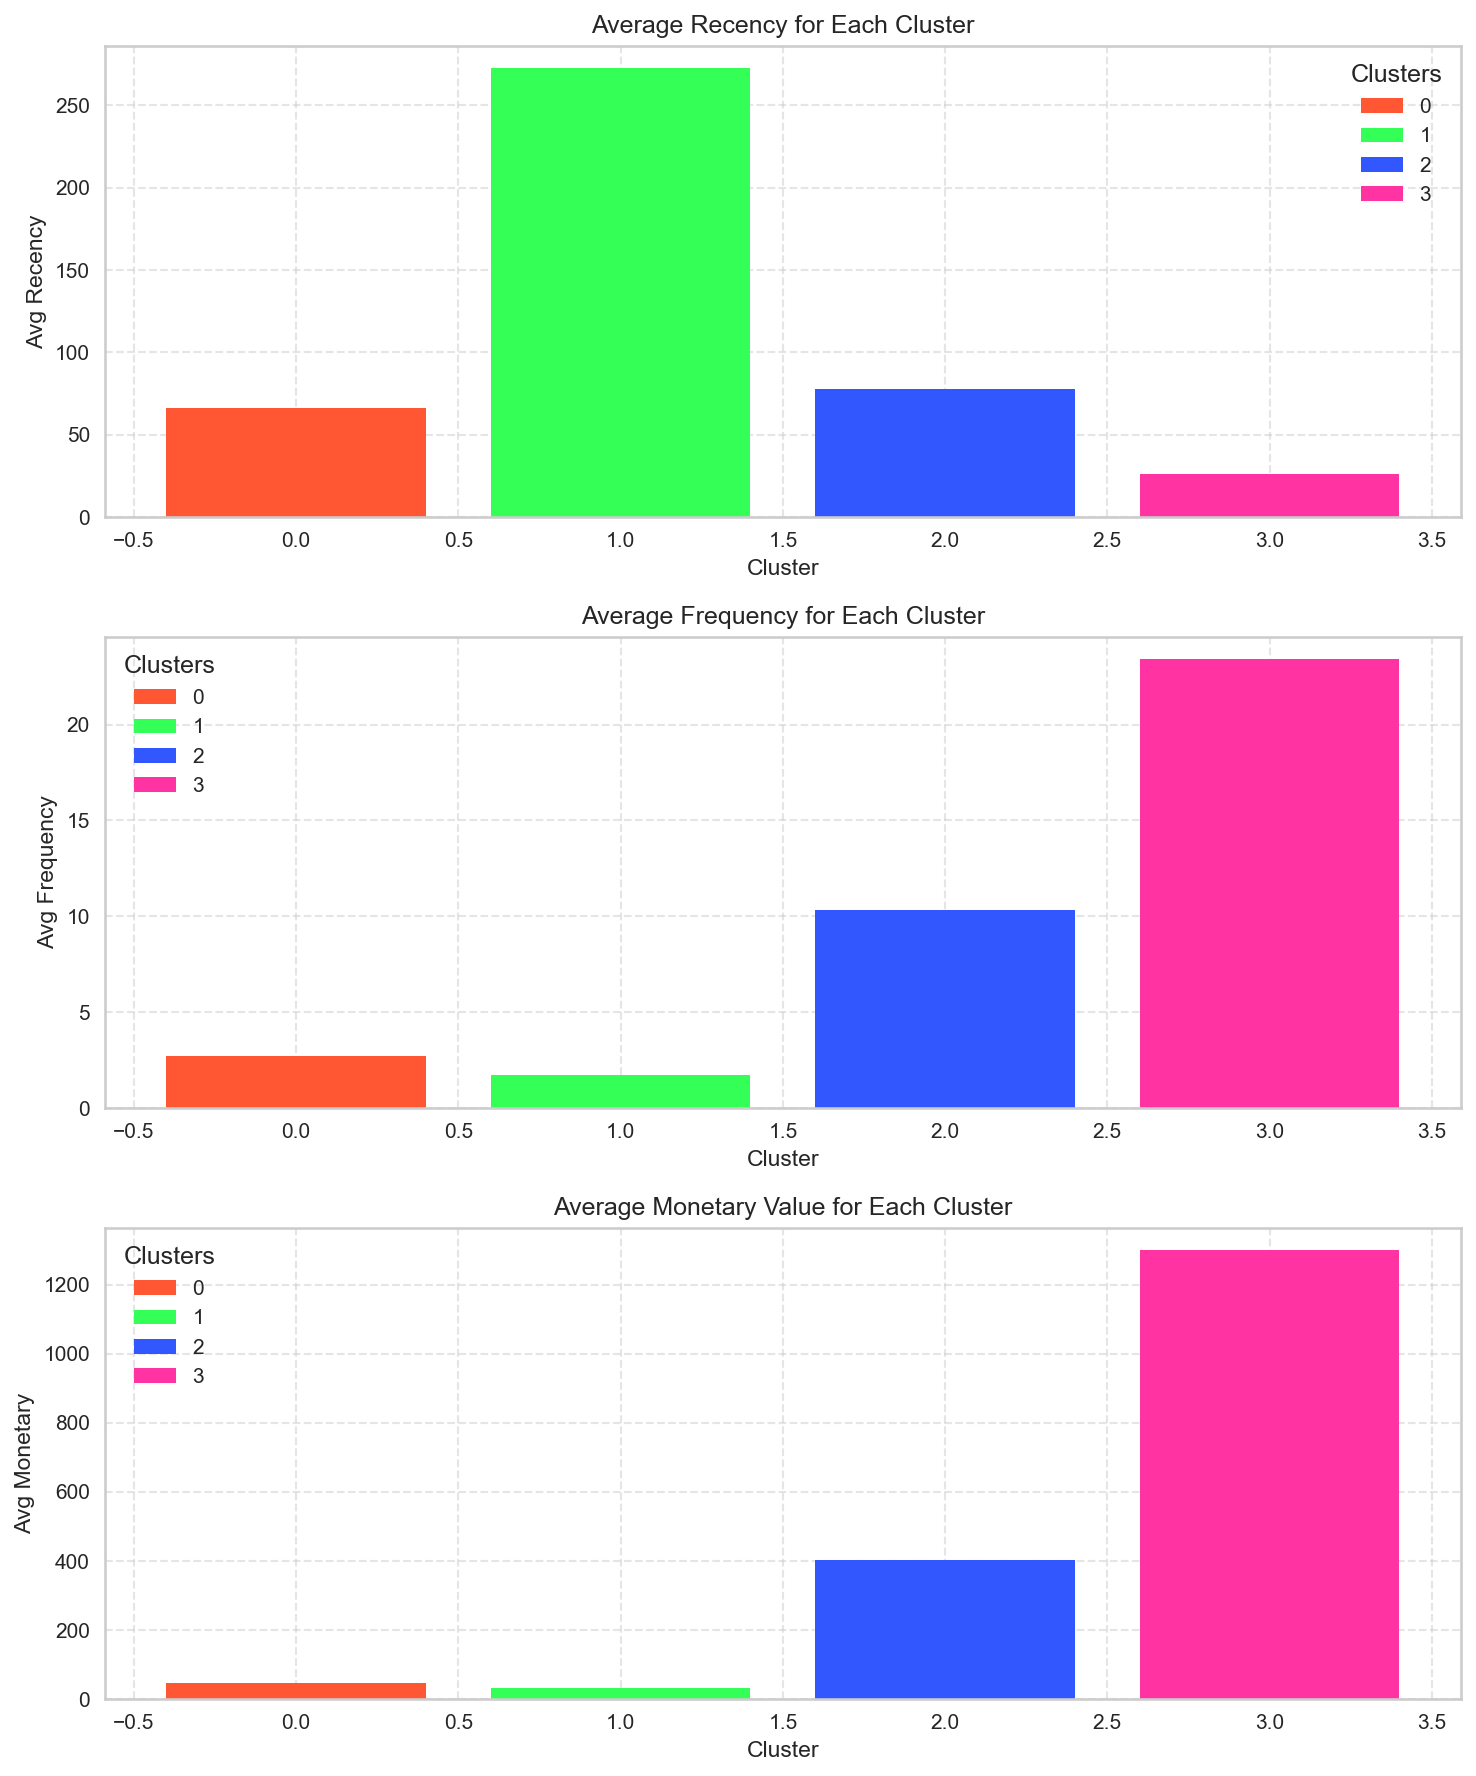

In [61]:
# To make it more insightful, we can plot these characteristics for better visualization

# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 12), dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(Norm_cluster_summary['Cluster'], Norm_cluster_summary['Recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Norm_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Frequency
plt.subplot(3, 1, 2)
bars = plt.bar(Norm_cluster_summary['Cluster'], Norm_cluster_summary['Frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Norm_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

# Plot Avg Monetary
plt.subplot(3, 1, 3)
bars = plt.bar(Norm_cluster_summary['Cluster'], Norm_cluster_summary['Monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, Norm_cluster_summary['Cluster'], title='Clusters') # Removed redundant legend

plt.tight_layout()
plt.show()

**Average Recency for Each Cluster**

The "Average Recency for Each Cluster" chart shows the average number of days since the last purchase for customers in each cluster. Cluster 1 (blue) has the highest average recency, indicating these customers have not made a purchase in a long time. Cluster 0 (red) has a lower recency value, suggesting these customers haven't made a purchase recently, but not as long ago as those in Cluster 1. Cluster 2 (green) has moderate recency, showing they have made purchases relatively recently compared to the previous clusters. Cluster 3 (orange) has the lowest recency, indicating that these customers have made their most recent purchases very recently.

**Average Frequency for Each Cluster**

The "Average Frequency for Each Cluster" chart illustrates how often customers in each cluster make purchases. Cluster 3 (orange) exhibits the highest frequency, showing that these customers make purchases the most frequently. Cluster 2 (green) has moderate purchase frequency, indicating occasional purchasing behavior. Clusters 0 (red) and 1 (blue) show the lowest frequencies, indicating that these customers are less engaged and make purchases infrequently.

**Average Monetary Value for Each Cluster**

The "Average Monetary Value for Each Cluster" chart displays the average amount of money spent by customers in each cluster. Cluster 3 (orange) shows the highest average monetary value, indicating that these customers spend significantly more money on their purchases compared to other clusters. Cluster 2 (green) has a moderate average monetary value, while Clusters 0 (red) and 1 (blue) have the lowest monetary values. This suggests that customers in Clusters 0 and 1 not only purchase infrequently but also spend less when they do, indicating low engagement and value.


## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that is used to find clusters of varying shapes and sizes in a dataset. Unlike K-means, which requires specifying the number of clusters beforehand, DBSCAN does not require a predefined number of clusters. Instead, it identifies clusters based on the density of data points in a region.

In [62]:
rfm_New.head()

,Recency,Frequency,Monetary
Customer_ID,,,
22625,1,4,83.62
17912,1,23,844.54
17914,1,10,181.93
9348,1,1,50.11
11681,1,3,25.20


### Min Max Scaler

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rfm_New)

# Convert scaled array back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=rfm_New.columns)
scaled_df.head()

,Recency,Frequency,Monetary
0,0.0,0.030612,0.020944
1,0.0,0.224490,0.211852
2,0.0,0.091837,0.045609
3,0.0,0.000000,0.012537
4,0.0,0.020408,0.006287


**Plotting distances to the k-th nearest neighbor for sorted points**

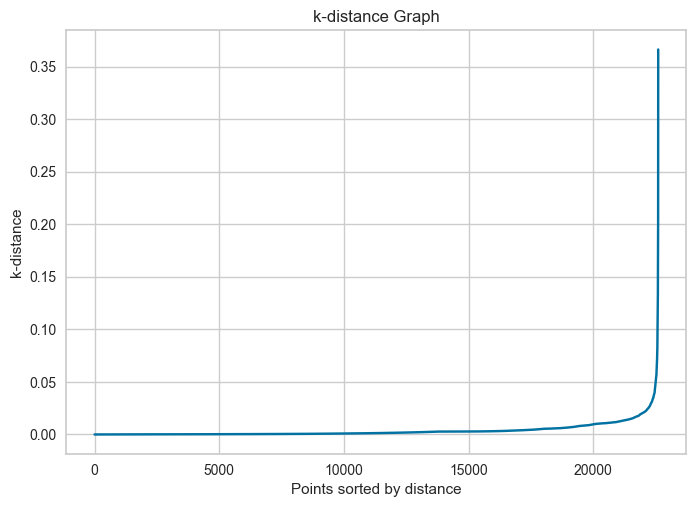

In [64]:
# Step 1: Select min_samples
min_samples = 6

# Step 2: Determine eps using the k-distance graph
# Compute k-nearest neighbors
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)

# Sort distances (distances to the k-th nearest neighbor)
distances = np.sort(distances[:, min_samples - 3])

# Plot k-distance graph
plt.plot(distances)
plt.ylabel('k-distance')
plt.xlabel('Points sorted by distance')
plt.title('k-distance Graph')
plt.show()

The k-distance graph helps determine the `eps` parameter for the DBSCAN algorithm by plotting distances to the k-th nearest neighbor for sorted points. The Y-axis represents these k-distances, while the X-axis shows points sorted by distance. The graph typically features a flat region indicating dense clusters, an "elbow point" marking a sharp increase in slope that signifies the transition from dense to sparse regions, and a rapid rise in distances beyond this point indicating sparse regions. The elbow point, at around a k-distance of 0.02 in this graph, is ideal for `eps`, ensuring that DBSCAN effectively captures dense clusters and ignores noise in sparser areas.

**Perform DBSCAN Clustering Algorithm**

In [65]:
np.random.seed(42)
# Apply DBSCAN
clusters= DBSCAN(eps=0.02, min_samples=6).fit(scaled_df)
scaled_df['Clusters'] = clusters.labels_
labels = clusters.labels_
scaled_df.head()

,Recency,Frequency,Monetary,Clusters
0,0.0,0.030612,0.020944,0
1,0.0,0.224490,0.211852,-1
2,0.0,0.091837,0.045609,0
3,0.0,0.000000,0.012537,0
4,0.0,0.020408,0.006287,0


**Getting total count for each cluster**

In [66]:
dist_dbscan = scaled_df['Clusters'].value_counts()
dist_dbscan

Clusters
 0    21858
-1      695
 1       13
 2       10
 4        7
 3        6
 5        6
 6        5
Name: count, dtype: int64

**Calculate the mean R, F, and M scores for each cluster**

In [67]:
# Calculate the mean R, F, and M scores for each cluster
dbscan_cluster_summary = scaled_df.groupby('Clusters').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Print the cluster summary
print(dbscan_cluster_summary)

   Clusters   Recency  Frequency  Monetary
0        -1  0.285582   0.140405  0.161962
1         0  0.448923   0.014876  0.012574
2         1  0.038567   0.099686  0.187238
3         2  0.043526   0.165306  0.207169
4         3  0.043159   0.173469  0.134364
5         4  0.109406   0.151603  0.070841
6         5  0.710744   0.032313  0.118579
7         6  0.903030   0.012245  0.090976


**Calculate Silhouette Score**

In [68]:
# Calculate Silhouette Score
ss_dbscan = silhouette_score(scaled_df, labels)
ss_dbscan 


0.663263514717961

**Plot these characteristics for better visualization**

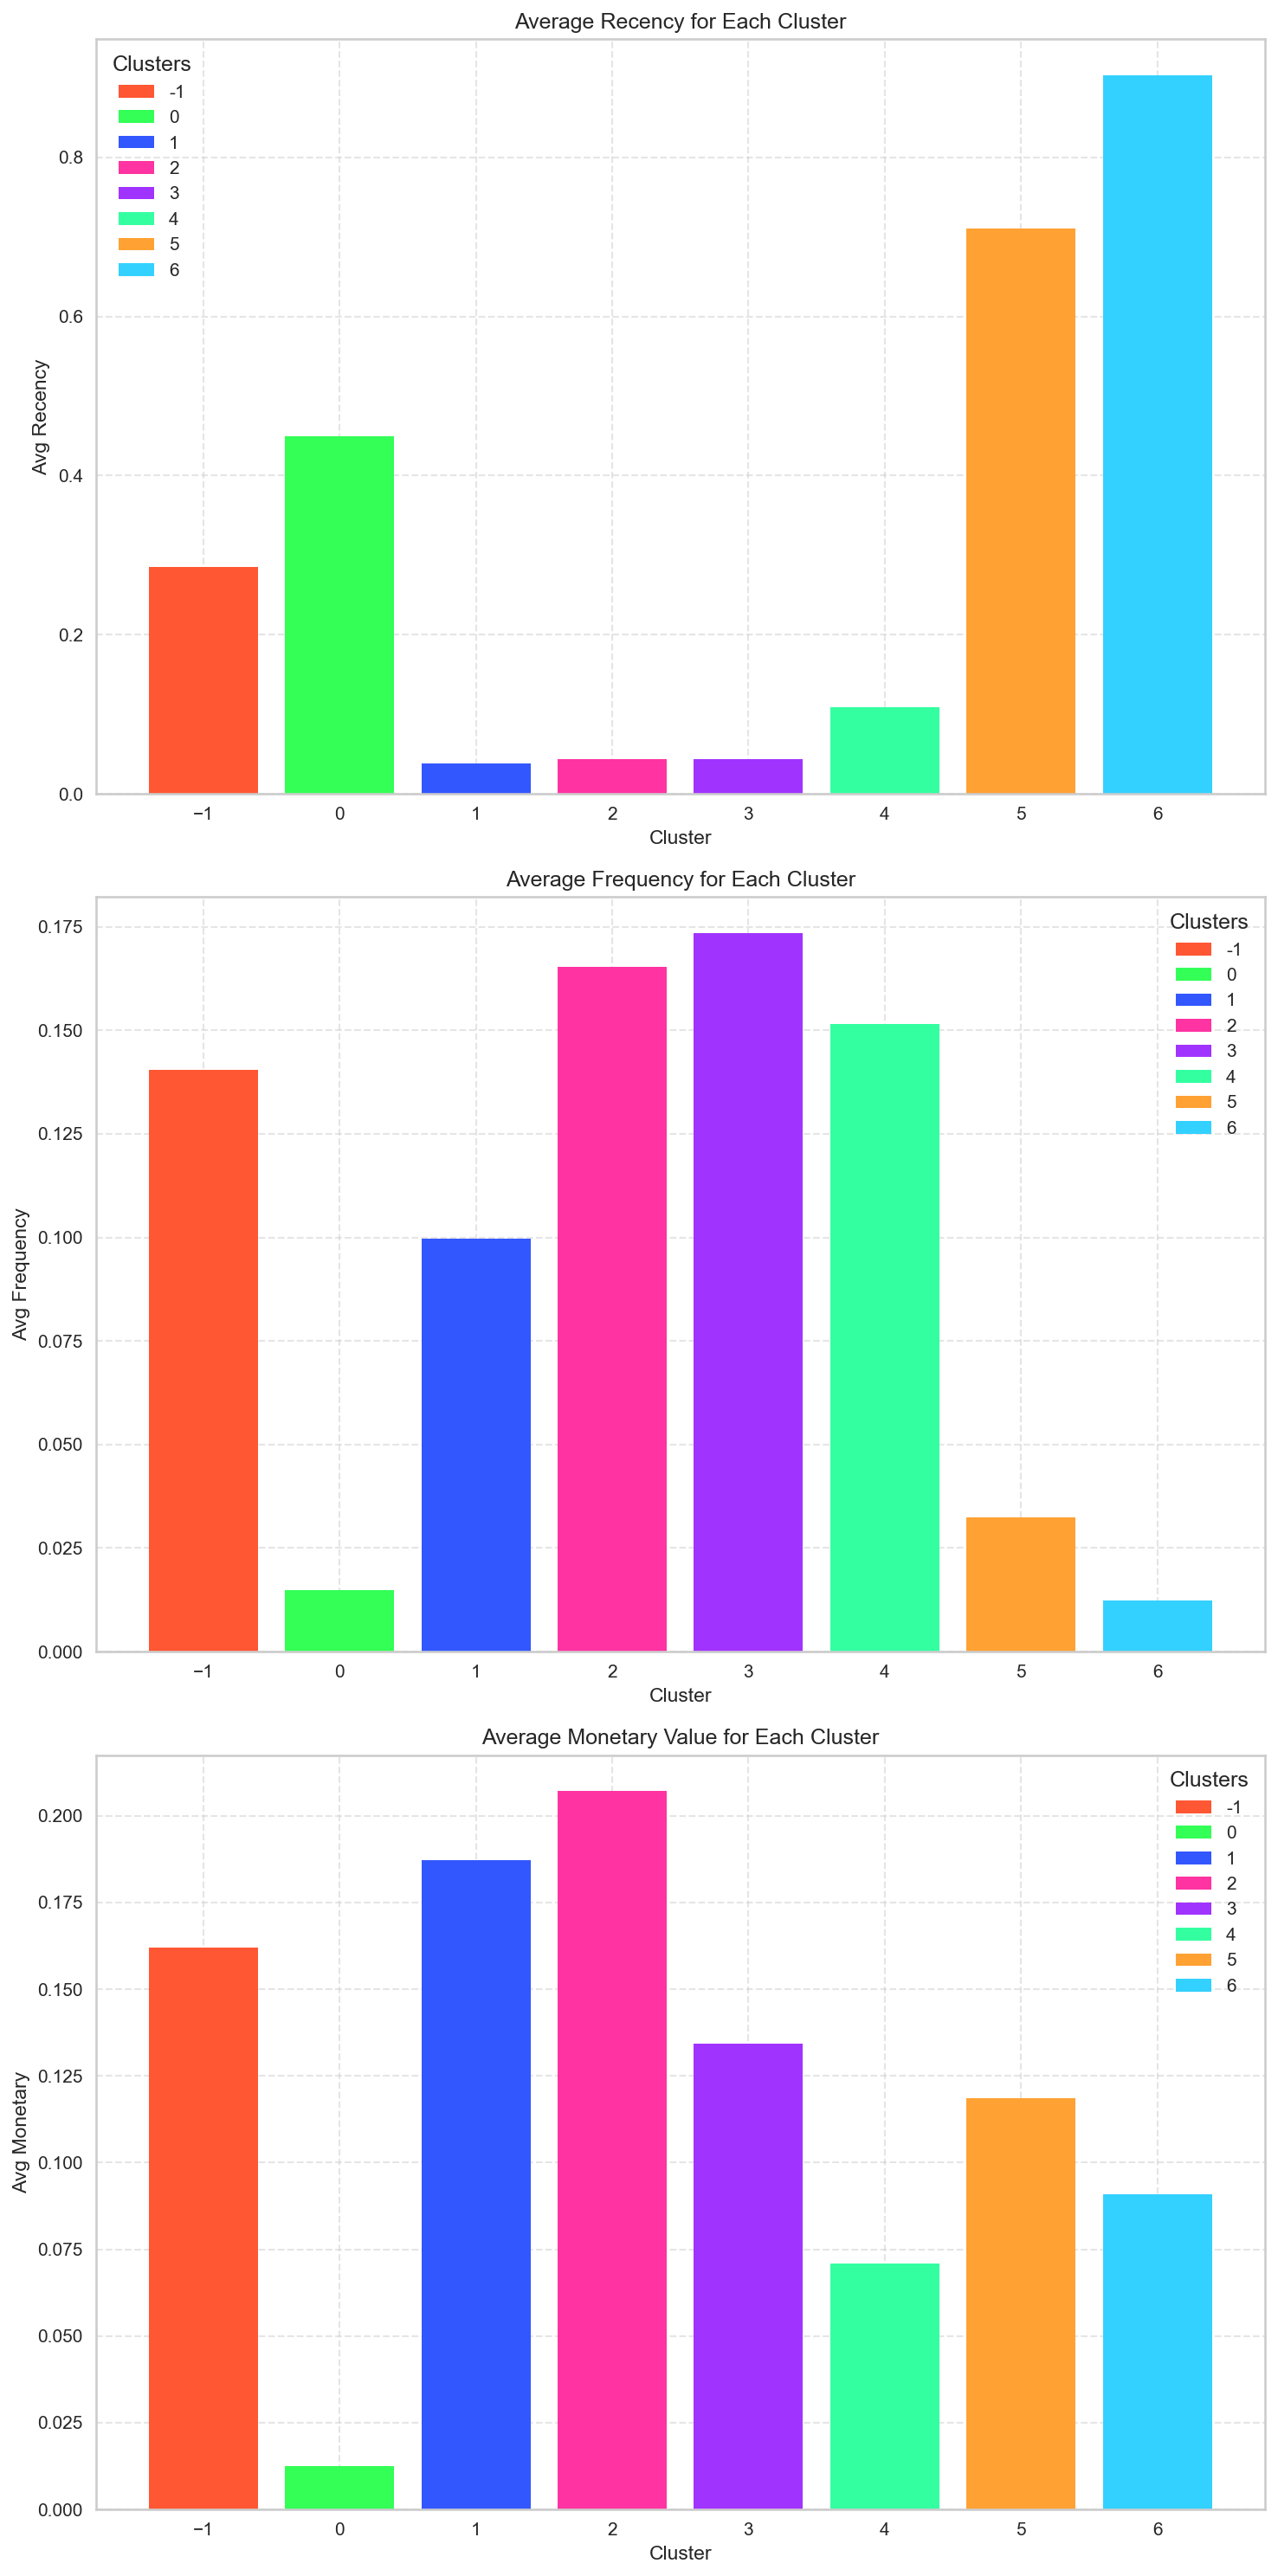

In [69]:
# Define a fixed list of colors

plt.figure(figsize=(10, 20), dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(dbscan_cluster_summary['Clusters'], dbscan_cluster_summary['Recency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, dbscan_cluster_summary['Clusters'], title='Clusters') # Removed redundant legend

# Plot Avg Frequency

# Plot the average RFM scores for each cluster
#plt.figure(figsize=(10, 20), dpi=150)
plt.subplot(3, 1, 2)
bars = plt.bar(dbscan_cluster_summary['Clusters'], dbscan_cluster_summary['Frequency'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, dbscan_cluster_summary['Clusters'], title='Clusters') # Removed redundant legend

# Plot Avg Monetary
#plt.figure(figsize=(10, 20), dpi=150)

plt.subplot(3, 1, 3)
bars = plt.bar(dbscan_cluster_summary['Clusters'], dbscan_cluster_summary['Monetary'], color=colors)
plt.xlabel('Cluster')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, dbscan_cluster_summary['Clusters'], title='Clusters') # Removed redundant legend

plt.tight_layout()
plt.show()

 **Average Recency for Each Cluster**: 
 
 The first graph shows the average recency for each cluster, indicating how recently customers in each cluster have made a purchase. The y-axis represents the average recency, while the x-axis represents different clusters. Clusters 5 and 6 show the highest average recency, indicating that these customers have made purchases most recently. Clusters 0 and -1 also have relatively high recency, while clusters 1, 2, 3, and 4 have much lower average recency values, suggesting that customers in these clusters have not made purchases recently.


**Average Frequency for Each Cluster**: 

The second graph depicts the average frequency of purchases for each cluster. The y-axis represents the average frequency, while the x-axis represents different clusters. Clusters 2, 3, and 4 have the highest average frequency, indicating that customers in these clusters make purchases more frequently. Cluster -1 also shows a relatively high frequency, whereas clusters 0, 5, and 6 have lower average frequencies, suggesting that customers in these clusters make purchases less often.

**Average Monetary Value for Each Cluster**: 

The third graph illustrates the average monetary value of purchases for each cluster. The y-axis represents the average monetary value, while the x-axis represents different clusters. Cluster 2 shows the highest average monetary value, indicating that customers in this cluster spend more on their purchases. Clusters 1 and 3 also have high average monetary values, followed by clusters -1 and 6. Clusters 4 and 5 show lower average monetary values, suggesting that customers in these clusters spend less on their purchases.

### Perform Hierarchical Clustering

Hierarchical clustering is a method of clustering that seeks to build a hierarchy of clusters. It can be useful for identifying nested clusters and understanding the relationships between data points at different levels of granularity. There are two main approaches to hierarchical clustering: agglomerative and divisive.

### Standard Scaler

In [70]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(Hr_df)

**Linkage Criteria: Determine how to calculate the distance between clusters**

In [71]:
hc_average = linkage(X, "average")  # We created a connection matrix with the average method.
hc_ward = linkage(X, "ward")  # We created a connection matrix with the ward method.
hc_complete = linkage(X, "complete")  # We created a connection matrix with the complete method.
hc_single = linkage(X, "single")  # We created a connection matrix with the single method.
hc_centroid = linkage(X, "centroid")  # We created a connection matrix with the centroid method.

**Dendrogram: Build a dendrogram to visualize the hierarchical relationships**


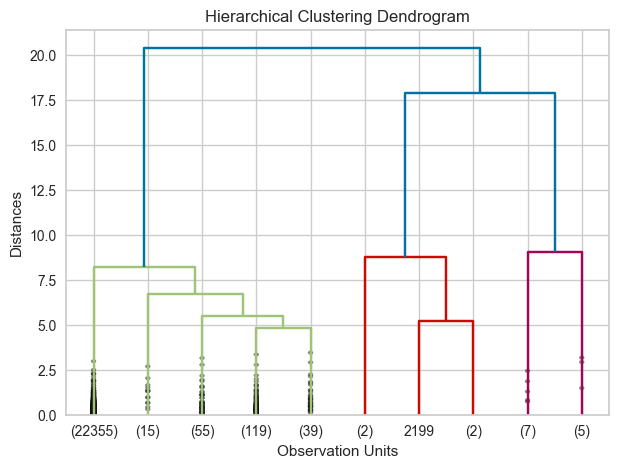

In [72]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observation Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

The graph is a dendrogram, a visual representation of hierarchical clustering, which groups similar observation units based on their distances. Each horizontal line in the dendrogram represents a cluster, and the height at which two lines merge indicates the distance between the clusters. The observation units are displayed along the bottom axis, with numbers indicating the count of observations in each branch. The y-axis represents the distance or dissimilarity between clusters, with larger distances indicating more dissimilar groups. The branches are color-coded, highlighting distinct clusters that were formed during the clustering process. The plot shows that at the highest level, there are four major clusters, as indicated by the four main branches (green, red, blue, and purple). The counts under each branch provide insight into the distribution of observations within these clusters, with some clusters containing a large number of observations and others being much smaller, as seen with counts like 22355, 2199, and 15, indicating varying sizes and densities of clusters.

**Agglomerative Hierarchical Clustering (Bottom-Up Approach):**

Start: Begin with each data point as its own cluster.
Merge: Iteratively merge the closest clusters based on a distance metric until only one cluster remains or a stopping criterion is met.
Result: Creates a tree-like structure called a dendrogram, which shows the arrangement of clusters.

In [73]:
#rfm_normalized['Clusters']
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = hc.fit_predict(X)
Hr_df['Clusters'] = labels
Hr_df.head()

,Recency,Frequency,Monetary,Clusters
Customer_ID,,,,
22625,1,4,83.62,1
17912,1,23,844.54,0
17914,1,10,181.93,3
9348,1,1,50.11,1
11681,1,3,25.20,1


**Getting the total count for each cluster**

In [74]:
dist_hr = Hr_df['Clusters'].value_counts()
dist_hr

Clusters
1    10920
2     9601
3     1725
0      354
Name: count, dtype: int64

**Calculate Silhouette Score**

In [75]:
# Calculate Silhouette Score
ss_hr = silhouette_score(X, labels)
ss_hr

0.49628553075607407

**Calculate the mean R, F, and M scores for each cluster**

In [76]:
# Calculate the mean R, F, and M scores for each cluster
hr_cluster_summary = Hr_df.groupby('Clusters').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Print the cluster summary
print(hr_cluster_summary)

   Clusters     Recency  Frequency    Monetary
0         0   20.225989  23.757062  857.861186
1         1   81.617674   2.031136   37.623355
2         2  281.585356   1.865951   43.871670
3         3   33.957681   9.300290  254.712730


**Plot these characteristics for better visualization**

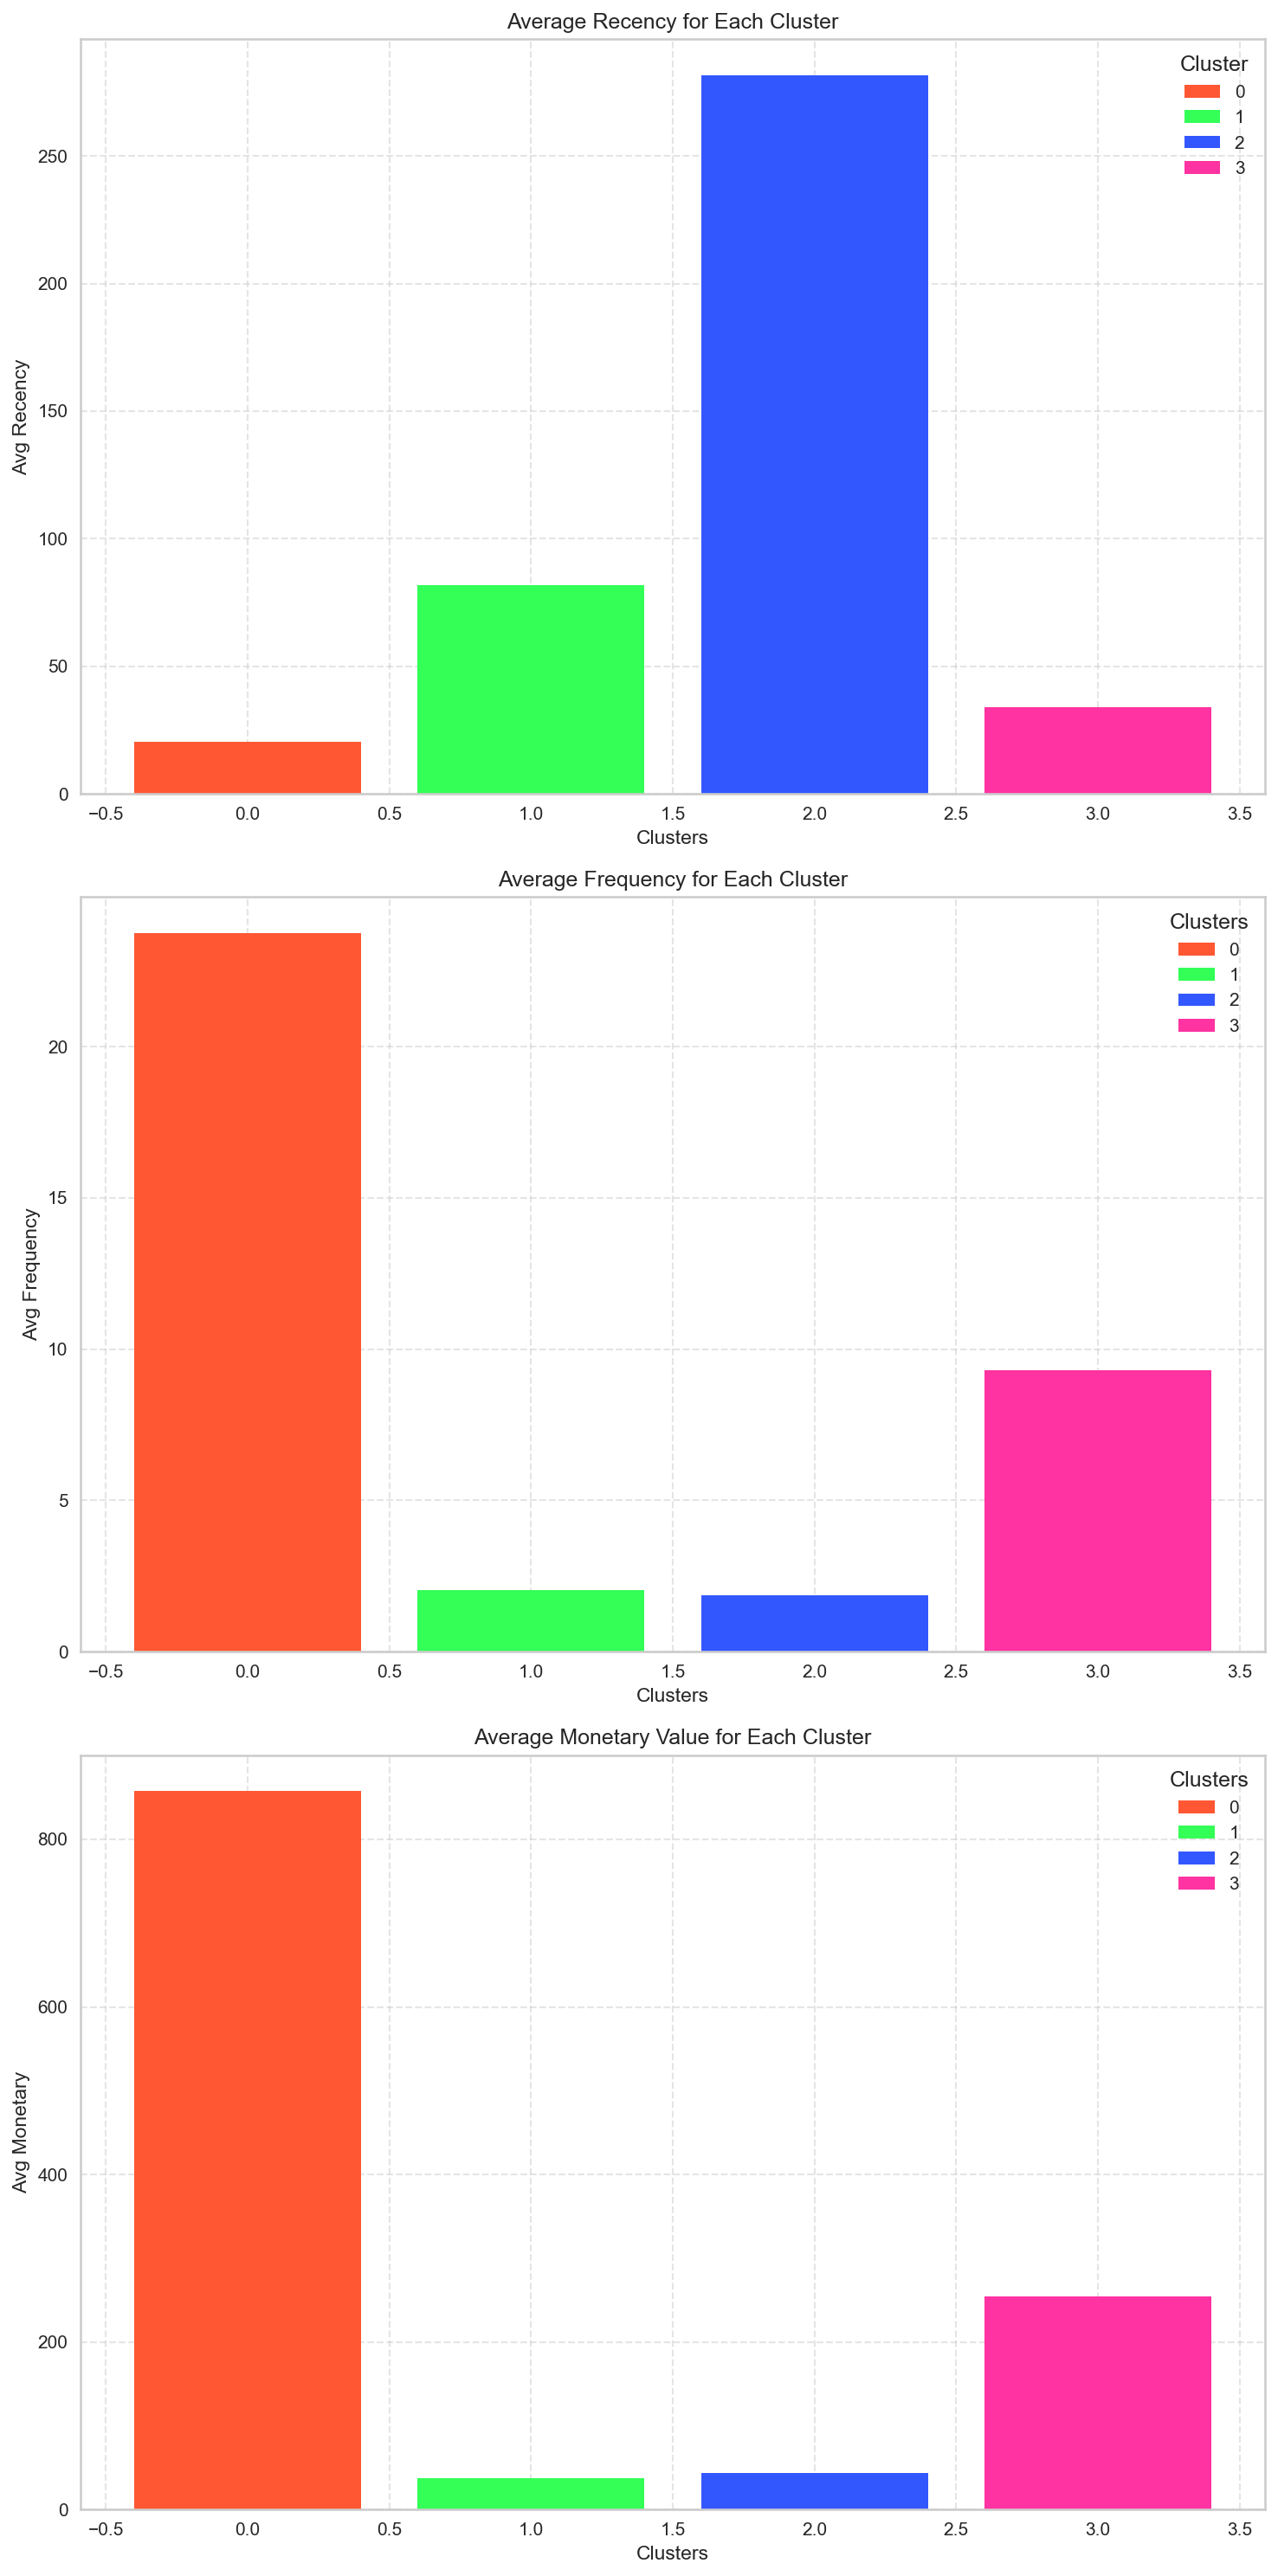

In [77]:
# Plot the average RFM scores for each cluster
plt.figure(figsize=(10, 20), dpi=150)

# Plot Avg Recency
plt.subplot(3, 1, 1)
bars = plt.bar(hr_cluster_summary['Clusters'], hr_cluster_summary['Recency'], color=colors)
plt.xlabel('Clusters')
plt.ylabel('Avg Recency')
plt.title('Average Recency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, hr_cluster_summary['Clusters'], title='Cluster') # Removed redundant legend

# Plot Avg Frequency

# Plot the average RFM scores for each cluster
#plt.figure(figsize=(10, 20), dpi=150)
plt.subplot(3, 1, 2)
bars = plt.bar(hr_cluster_summary['Clusters'], hr_cluster_summary['Frequency'], color=colors)
plt.xlabel('Clusters')
plt.ylabel('Avg Frequency')
plt.title('Average Frequency for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, hr_cluster_summary['Clusters'], title='Clusters') # Removed redundant legend

# Plot Avg Monetary
#plt.figure(figsize=(10, 20), dpi=150)

plt.subplot(3, 1, 3)
bars = plt.bar(hr_cluster_summary['Clusters'], hr_cluster_summary['Monetary'], color=colors)
plt.xlabel('Clusters')
plt.ylabel('Avg Monetary')
plt.title('Average Monetary Value for Each Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bars, hr_cluster_summary['Clusters'], title='Clusters') # Removed redundant legend

plt.tight_layout()
plt.show()

**Average Recency for Each Cluster**

The bar chart shows the average recency for each cluster identified in a dataset, which is labeled along the x-axis as clusters 0, 1, 2, and 3. The y-axis represents the average recency value, which appears to be a measure of how recent or frequent an event or action associated with each cluster is, with higher values indicating less recent or less frequent occurrences. Cluster 2 has the highest average recency, suggesting that the observations in this cluster involve events or actions that are less recent or frequent. Clusters 0, 1, and 3 have lower average recency values, with cluster 0 having the lowest, indicating more recent or frequent activities compared to the other clusters. The differences in average recency across clusters highlight distinct temporal patterns or behaviors within the data.


**Average Frequency for Each Cluster**

The bar chart illustrates the average frequency of occurrences for each cluster, labeled on the x-axis as clusters 0, 1, 2, and 3. The y-axis represents the average frequency, indicating how often the events or actions associated with each cluster occur. Cluster 0 exhibits a significantly higher average frequency than the other clusters, suggesting that the activities or events in this cluster occur much more frequently. In contrast, clusters 1, 2, and 3 have much lower average frequencies, indicating less frequent occurrences. Among these, cluster 3 has the next highest frequency, followed by clusters 1 and 2, which have similar and relatively low frequencies. The color coding helps differentiate between the clusters, with cluster 0 shown in blue, cluster 1 in green, cluster 2 in brown, and cluster 3 in light green. This chart highlights distinct patterns in how frequently different clusters experience events or actions.


**Average Monetary Value for Each Cluster**

The bar chart displays the average monetary value for each cluster in a dataset. Cluster 0 has an overwhelmingly higher average monetary value compared to the other clusters, reaching just above 900 units. Clusters 1, 2, and 3 show significantly lower average monetary values, with Cluster 1 being the lowest and Cluster 3 being slightly higher than Cluster 2. The chart highlights a substantial disparity in monetary values among the clusters, with Cluster 0 standing out as the most significant by a large margin.

### Compare

**Visualizing Silhouette Score for each Scaling method anf Clustering Algorithm applied**

In [78]:
index = ['Score']

matrix = pd.DataFrame({'Kmeans(Min-Max) score': ss_mm,
          'Kmeans(standard) score': ss_stand,
          'Kmeans(Normal) score': ss_nor,
          'Dbscan score': ss_dbscan,
          'Hirachical score': ss_hr 
    
}, index = index)
matrix

,Kmeans(Min-Max) score,Kmeans(standard) score,Kmeans(Normal) score,Dbscan score,Hirachical score
Score,0.533403,0.527738,0.580509,0.663264,0.496286


In [79]:
# Assuming you have already created your DataFrame 'matrix2'
matrix2 = pd.DataFrame({'Kmeans(Min-Max) dist': dis_mm,
          'Kmeans(standard) dist': dis_stand,
          'Kmeans(Normal) dist': dis_nor,
          'Dbscan dist': dist_dbscan,
          'Hirachical dist': dist_hr})

# Replace NaN with "Not applicable"
matrix2.replace(np.nan,"Not applicable", inplace=True)

matrix2

,Kmeans(Min-Max) dist,Kmeans(standard) dist,Kmeans(Normal) dist,Dbscan dist,Hirachical dist
-1,Not applicable,Not applicable,Not applicable,695,Not applicable
0,4683.0,10238.0,10686.0,21858,354.0
1,6932.0,10427.0,10430.0,13,10920.0
2,6218.0,1710.0,1324.0,10,9601.0
3,4767.0,225.0,160.0,6,1725.0
4,Not applicable,Not applicable,Not applicable,7,Not applicable
5,Not applicable,Not applicable,Not applicable,6,Not applicable
6,Not applicable,Not applicable,Not applicable,5,Not applicable


**Marketing Analysis on best model**

**Labelling each cluster**

In [80]:
# Assign label names for each cluster based on the provided details
label_names = {
    0: 'Drifting Customers',
    1: 'Loyal Customers',
    2: 'Dormant Customers',
    3: 'Occasional Customers'
}

In [81]:
cluster_counts = rfm_df['Cluster'].value_counts()

# Calculate the total number of customers
total_customers = cluster_counts.sum()

# Calculate the percentage of customers in each cluster
percentage_customers = (cluster_counts / total_customers) * 100

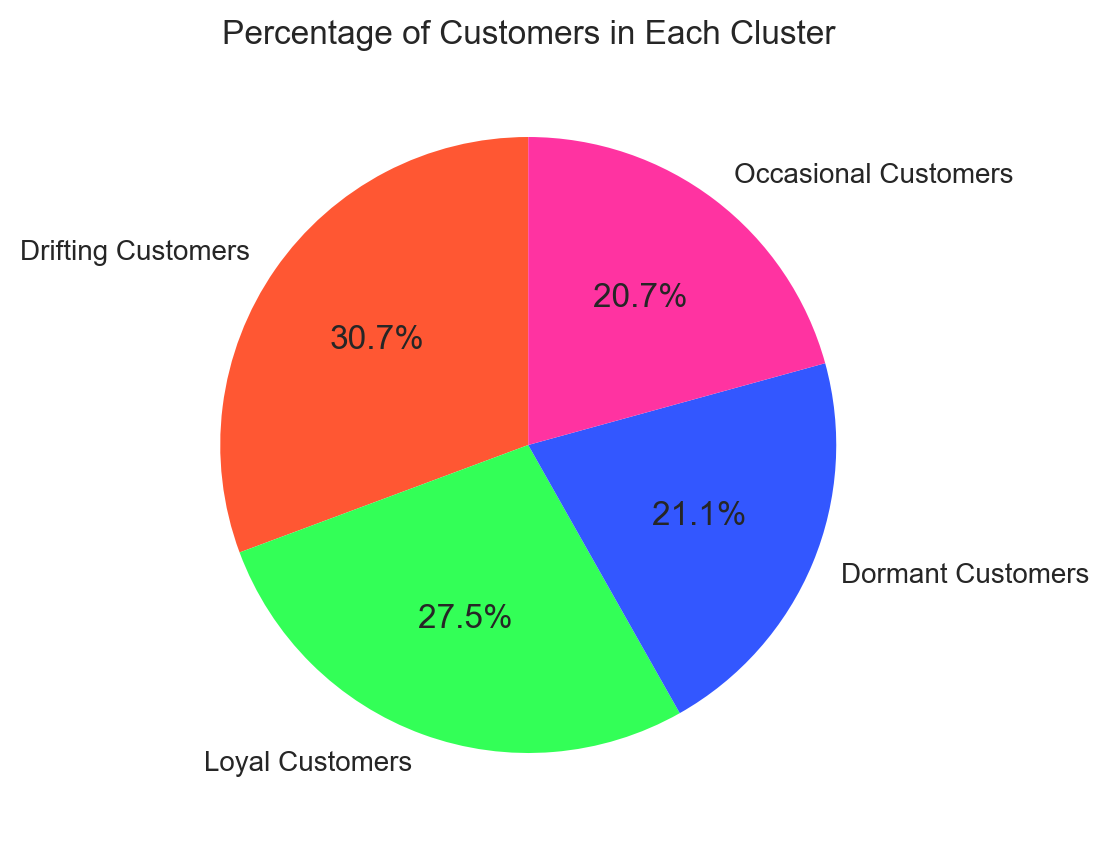

In [82]:
# Create a pie chart with label names
plt.figure(figsize=(5, 5), dpi=200)
plt.pie(percentage_customers, labels=label_names.values(), autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Customers in Each Cluster')
#plt.legend(label_names.values(), title='Cluster', loc='lower left', bbox_to_anchor=(1, 0.5))  # Move the legend to the right

plt.show()

The "Percentage of Customers in Each Cluster" pie chart shows the distribution of customers among four clusters. Drifting Customers form the largest segment at 30.7%, indicating they haven't made recent purchases, buy infrequently, and spend less. Loyal Customers, who purchase frequently and spend significantly, make up 27.5%. Dormant Customers, representing 21.1%, have not made purchases for a long time and have low engagement. Occasional Customers, comprising 20.7%, make moderate purchases both in frequency and amount. These insights guide targeted marketing strategies to re-engage drifting and dormant customers, reward loyal customers, and encourage occasional customers to buy more frequently.

**Calculating Recency, Frequency and Monatary for each cluster**

In [83]:
cluster_summary

,Cluster,Recency,Frequency,Monetary
0,0,218.039932,1.851377,39.446650
1,1,28.263849,4.920081,128.464934
2,2,309.781119,1.823416,43.346790
3,3,108.512272,2.188798,48.320399


**Labelling the cluster_summary dataframe with the cluster names**

In [84]:
cluster_summary['Label'] = cluster_summary['Cluster'].map(label_names)
cluster_summary

,Cluster,Recency,Frequency,Monetary,Label
0,0,218.039932,1.851377,39.446650,Drifting Customers
1,1,28.263849,4.920081,128.464934,Loyal Customers
2,2,309.781119,1.823416,43.346790,Dormant Customers
3,3,108.512272,2.188798,48.320399,Occasional Customers


**Plotting Radar Charts for each key component of RFM**

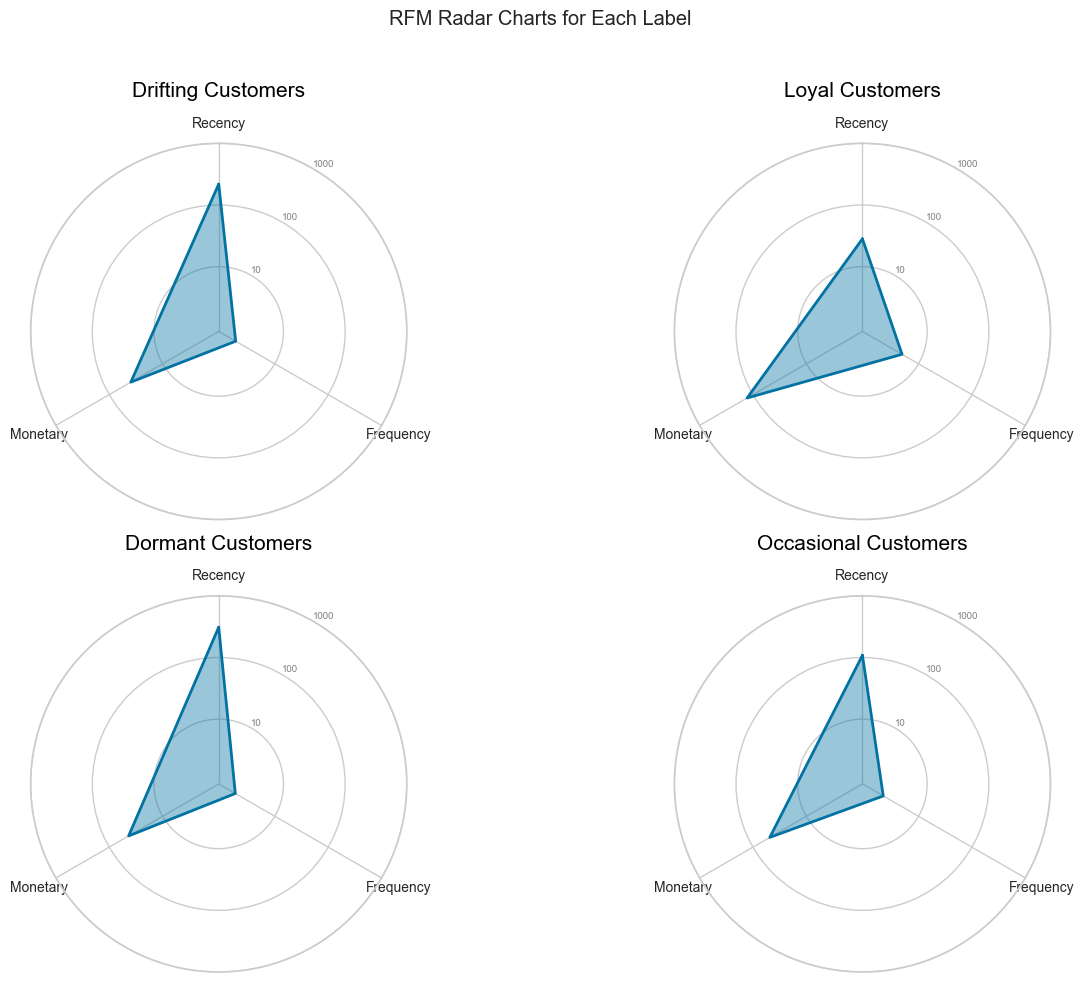

In [85]:
# Function to plot radar chart
def plot_radar(ax, data, labels, title):
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Prepare the radar chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Draw ylabels
    ax.set_rscale('log')
    ax.set_rlabel_position(30)
    ax.set_yticks([10, 100, 1000])
    ax.set_yticklabels(["10", "100", "1000"], color="grey", size=7)
    ax.set_ylim(0, 1000)

    # Plot data
    values = data.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)

    # Title
    ax.set_title(title, size=15, color='black', y=1.1)

# Labels for the radar chart
labels = ['Recency', 'Frequency', 'Monetary']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw=dict(polar=True))
fig.suptitle('RFM Radar Charts for Each Label')

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot radar chart for each label
for i, (index, row) in enumerate(cluster_summary.iterrows()):
    plot_radar(axs[i], row[['Recency', 'Frequency', 'Monetary']], labels, row['Label'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Drifting Customers**

The term "Drifting Customers" is used because these customers haven't made a purchase recently (high recency), buy infrequently (low frequency), and spend relatively little money (low monetary). They are drifting away from regular engagement and purchases.

**Loyal Customers**

"Loyal Customers" are those who purchase frequently (high frequency), have made recent purchases (low recency), and spend a significant amount of money (high monetary). These customers show consistent and valuable engagement with the business.

**Dormant Customers**

The term "Dormant Customers" reflects customers who haven't made a purchase in a long time (very high recency), buy infrequently (low frequency), and have low spending (low monetary). They are essentially inactive or "dormant" customers who may need reactivation strategies.

**Occasional Customers**

"Occasional Customers" are characterized by making purchases every now and then (moderate frequency), with moderately recent purchase activity (moderate recency) and moderate spending (monetary). These customers engage sporadically but are not highly consistent.

## Marketing Strategies

Developing targeted marketing strategies for each of these customer clusters can help optimize engagement and improve customer retention and value. Here are tailored strategies for each cluster:

**Drifting Customers**

**Marketing Strategy**:
1. **Reactivation Campaigns**: Use personalized emails or messages reminding them of the brand and encouraging them to return. Offer time-sensitive discounts or special promotions to entice them back.
2. **Win-back Offers**: Provide exclusive deals or discounts to incentivize their return, such as "We Miss You" coupons.
3. **Content Marketing**: Share engaging and relevant content to rekindle their interest. This could include blog posts, newsletters, or social media updates showcasing new products or services.
4. **Feedback and Surveys**: Reach out to understand why they have drifted away. Use their feedback to improve the product or service offerings.

**Loyal Customers**

**Marketing Strategy**:
1. **Loyalty Programs**: Enhance their experience with loyalty rewards programs that offer points for purchases, exclusive access to new products, or special events.
2. **VIP Treatment**: Offer VIP experiences, early access to sales, or special customer service channels.
3. **Referral Programs**: Encourage them to refer friends and family with incentives, turning their loyalty into new customer acquisition.
4. **Personalized Recommendations**: Use their purchasing history to recommend products they might be interested in, making their shopping experience more personalized.

**Dormant Customers**

**Marketing Strategy**:
1. **Reactivation Discounts**: Offer significant discounts or incentives to reactivate these customers, such as a "Welcome Back" discount.
2. **Multi-Channel Outreach**: Use various channels to reach out, including email, SMS, and social media. Tailor the message to remind them of the brand and its offerings.
3. **Product Updates**: Inform them about new products or services that have been launched since their last purchase.
4. **Inactivity Feedback**: Request feedback to understand the reasons behind their inactivity and address any concerns or issues they may have had.

**Occasional Customers**

**Marketing Strategy**:
1. **Regular Engagement**: Keep them engaged with regular updates and newsletters about new products, sales, and promotions.
2. **Targeted Promotions**: Offer targeted promotions based on their previous purchases to encourage more frequent shopping.
3. **Seasonal Offers**: Capitalize on seasonal trends and offer special deals during holidays or other significant times of the year.
4. **Incentivize Frequency**: Introduce offers that encourage more frequent purchases, such as "buy two, get one free" or other bundled deals.

These strategies aim to address the specific needs and behaviors of each cluster, driving better engagement and enhancing customer value.

## CLV Calculation

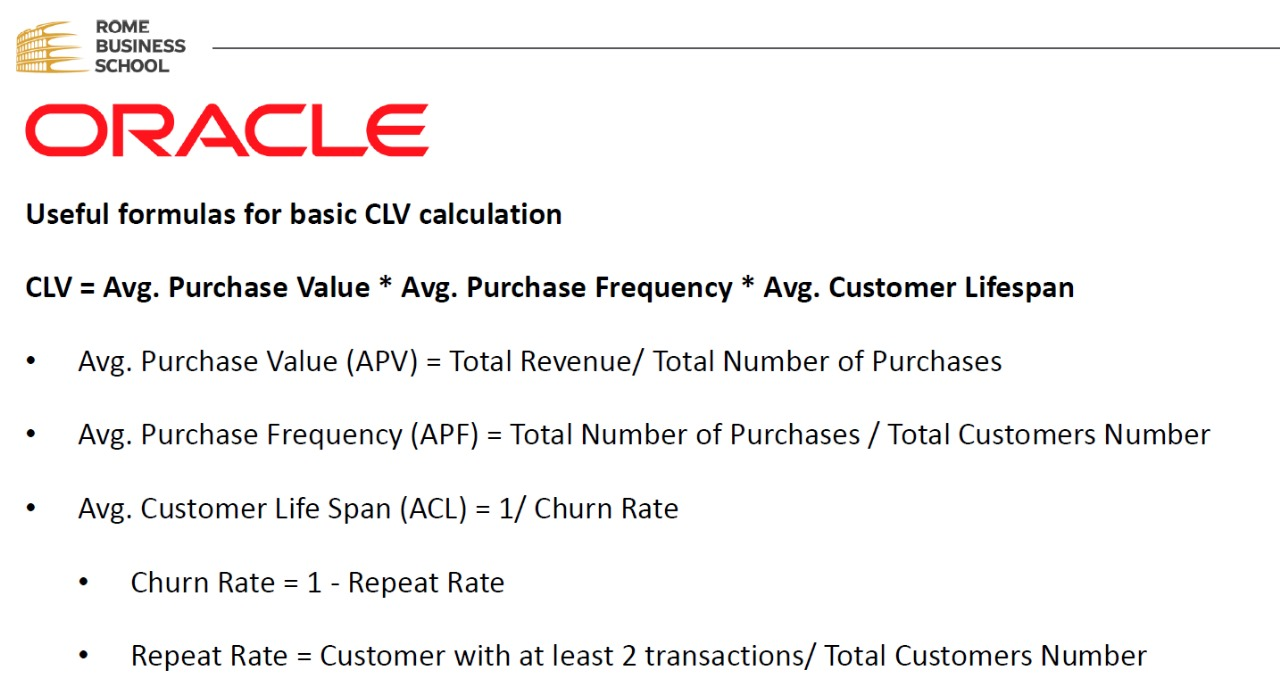

In [86]:
# Open an image file
img = Image.open('CLV image.png')
img

**Overview of the first rows of original dataframe**

In [87]:
Original_df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany


**Resetting the index of the RFM dataframe without applying anyother change**

In [88]:
rfm_df = rfm_df.reset_index()
rfm_df


,Customer_ID,Recency,Frequency,Monetary,Cluster
0,22625,1,4,83.62,1
1,17912,1,23,844.54,1
2,17914,1,10,181.93,1
3,9348,1,1,50.11,1
4,11681,1,3,25.20,1
...,...,...,...,...,...
22595,3992,364,1,26.19,2
22596,1614,364,1,5.32,2
22597,9223,364,1,12.12,2
22598,1891,364,1,9.82,2


**Creating a new dataframe which contains the Customer_ID with its corresponding cluster**

In [89]:
customer_label= rfm_df[['Customer_ID', 'Cluster']]
customer_label

,Customer_ID,Cluster
0,22625,1
1,17912,1
2,17914,1
3,9348,1
4,11681,1
...,...,...
22595,3992,2
22596,1614,2
22597,9223,2
22598,1891,2


**Mapping cluster names into every cluster number**

In [90]:
# Mapping cluster names into every cluster number
customer_label['Cluster'] = [label_names[i] for i in customer_label['Cluster']]

customer_label


,Customer_ID,Cluster
0,22625,Loyal Customers
1,17912,Loyal Customers
2,17914,Loyal Customers
3,9348,Loyal Customers
4,11681,Loyal Customers
...,...,...
22595,3992,Dormant Customers
22596,1614,Dormant Customers
22597,9223,Dormant Customers
22598,1891,Dormant Customers


**Exporting the customer_label dataframe into csv file**

In [91]:
customer_label.to_csv('CUSTOMER_CLUSTER_LABEL.csv')

**Mapping cluster names into every cluster number in the RFM DATAFRAME**

In [92]:
# Mapping cluster names into every cluster number
rfm_df['Cluster'] = [label_names[i] for i in rfm_df['Cluster']]

rfm_df

,Customer_ID,Recency,Frequency,Monetary,Cluster
0,22625,1,4,83.62,Loyal Customers
1,17912,1,23,844.54,Loyal Customers
2,17914,1,10,181.93,Loyal Customers
3,9348,1,1,50.11,Loyal Customers
4,11681,1,3,25.20,Loyal Customers
...,...,...,...,...,...
22595,3992,364,1,26.19,Dormant Customers
22596,1614,364,1,5.32,Dormant Customers
22597,9223,364,1,12.12,Dormant Customers
22598,1891,364,1,9.82,Dormant Customers


**Exporting the RFM DATAFRAME into csv file**

In [93]:
rfm_df.to_csv('RFM_CLUSTER_LABEL.csv')

**Overview of the original dataframe**

In [94]:
Original_df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece
711,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy
723,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France
724,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany
725,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany


**Merging the original dataframe and the rfm dataframe**

In [95]:
new_clv_df = pd.merge(Original_df, rfm_df, on='Customer_ID', how='left')
new_clv_df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Recency,Frequency,Monetary,Cluster
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,260,7,121.36,Drifting Customers
1,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,301,8,193.42,Dormant Customers
2,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,364,1,4.91,Dormant Customers
3,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,364,1,237.53,Dormant Customers
4,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,364,1,237.53,Dormant Customers


**Exporting the merged dataframe into a csv file**

In [96]:
new_clv_df.to_csv('Original_RFM_DF.csv')

**Defining the function to calculate:**
    Average Purchase Value (APV)
    Average Purchase Frequency (APF)
    Repeat Rate
    Churn Rate
    Average Customer Lifespan (ACL)
    Customer Lifetime Value (CLV)

In [97]:
def calculate_clv(data):
    # Calculate Average Purchase Value (APV)
    total_sales = data.groupby('Transaction_ID')['Sales_Amount'].sum().reset_index()
    apv = total_sales['Sales_Amount'].mean()

    # Calculate Average Purchase Frequency (APF)
    total_purchases = data['Transaction_ID'].nunique()
    total_customers = data['Customer_ID'].nunique()
    apf = total_purchases / total_customers

    # Calculate Repeat Rate
    purchase_counts = data.groupby('Customer_ID')['Transaction_ID'].nunique().reset_index()
    repeat_customers = purchase_counts[purchase_counts['Transaction_ID'] > 1]['Customer_ID'].count()
    repeat_rate = repeat_customers / total_customers if total_customers > 0 else 0

    # Calculate Churn Rate
    churn_rate = 1 - repeat_rate

    # Calculate Average Customer Lifespan (ACL)
    acl = 1 / churn_rate if churn_rate > 0 else 10

    # Calculate Customer Lifetime Value (CLV)
    clv_value = apv * apf * acl

    return apv, apf, acl, repeat_rate, churn_rate, clv_value


**Calculate_clv function using the dataframe as input**

In [98]:
# Running the calculate_clv function using the dataframe as input
results = calculate_clv(new_clv_df)

# Unpacking the results
apv, apf, acl, repeat_rate, churn_rate, clv_value = map(lambda x: round(x, 2), results)

# Printing the results
print('*****************************')
print(f"APV: {apv}")
print(f"APF: {apf}")
print(f"ACL: {acl}")
print(f"Repeat Rate: {repeat_rate}")
print(f"Churn Rate: {churn_rate}")
print(f"CLV: {clv_value}")
print('*****************************')


*****************************
APV: 24.4
APF: 2.86
ACL: 1.96
Repeat Rate: 0.49
Churn Rate: 0.51
CLV: 136.6
*****************************


**Calculate CLV for each Customer_ID**

In [99]:
# Define a helper function to calculate CLV and create a dictionary of results
def get_clv_dict(data, customer_id='Customer_ID'):
    try:
        apv, apf, acl, repeat_rate, churn_rate, clv_value = map(lambda x: round(x, 2), calculate_clv(data))
    except:
        apv = apf = acl = repeat_rate = churn_rate = clv_value = 0
    
    return {
        'Customer_ID': customer_id,
        'apv': apv,
        'apf': apf,
        'acl': acl,
        'repeat_rate': repeat_rate,
        'churn_rate': churn_rate,
        'clv': clv_value
    }

# Calculate CLV for the whole dataset
total_clv_results = get_clv_dict(new_clv_df)

# Calculate CLV for each customer_id and store all results in a list
clv_results =  [
    get_clv_dict(new_clv_df[new_clv_df['Customer_ID'] == id_c], id_c) for id_c in new_clv_df['Customer_ID'].unique()
]

# Create a DataFrame from the list of results
df_customer_clv = pd.DataFrame(clv_results)

# Remove rows with missing 'Customer_ID' or 'clv' values
df_customer_clv.dropna(subset=['Customer_ID', 'clv'], inplace=True)

df_customer_clv


,Customer_ID,apv,apf,acl,repeat_rate,churn_rate,clv
0,2547,17.34,7.0,10.0,1.0,0.0,1213.60
1,4948,24.18,8.0,10.0,1.0,0.0,1934.20
2,4530,4.91,1.0,1.0,0.0,1.0,4.91
3,4122,237.53,1.0,1.0,0.0,1.0,237.53
4,1253,26.92,6.0,10.0,1.0,0.0,1615.10
...,...,...,...,...,...,...,...
22595,22058,9.13,1.0,1.0,0.0,1.0,9.13
22596,11789,16.36,1.0,1.0,0.0,1.0,16.36
22597,9614,7.43,1.0,1.0,0.0,1.0,7.43
22598,22593,6.24,1.0,1.0,0.0,1.0,6.24


**Exporting the dataframe which contains CLV information for each Customer_ID into a csv file**

In [100]:
df_customer_clv.to_csv('CUSTOMER_CLV_DF.csv')

**Calculating CLV for each cluster**

In [101]:
# Define a helper function to calculate CLV and create a dictionary of results
def get_clv_dict(data, cluster_label='Total'):
    try:
        apv, apf, acl, repeat_rate, churn_rate, clv_value = map(lambda x: round(x, 2), calculate_clv(data))
    except:
        apv = apf = acl = repeat_rate = churn_rate = clv_value = 0
    
    return {
        'Cluster': cluster_label,
        'apv': apv,
        'apf': apf,
        'acl': acl,
        'repeat_rate': repeat_rate,
        'churn_rate': churn_rate,
        'clv': clv_value
    }

# Calculate CLV for the whole dataset
total_clv_results = get_clv_dict(new_clv_df)

# Calculate CLV for each cluster and store all results in a list
clv_results = [total_clv_results] + [
    get_clv_dict(new_clv_df[new_clv_df['Cluster'] == cluster], cluster) for cluster in new_clv_df['Cluster'].unique()
]

# Create a DataFrame from the list of results
df_cluster_clv = pd.DataFrame(clv_results)

# Remove rows with missing 'Cluster' or 'clv' values
df_cluster_clv.dropna(subset=['Cluster', 'clv'], inplace=True)

df_cluster_clv


,Cluster,apv,apf,acl,repeat_rate,churn_rate,clv
0,Total,24.40,2.86,1.96,0.49,0.51,136.60
1,Drifting Customers,21.31,1.85,1.63,0.38,0.62,64.12
2,Dormant Customers,23.77,1.82,1.57,0.36,0.64,67.84
3,Loyal Customers,26.11,4.92,3.25,0.69,0.31,417.50
4,Occasional Customers,22.08,2.19,1.87,0.47,0.53,90.54


**Exporting the dataframe which contains CLV information for each cluster into a csv file**

In [102]:
df_cluster_clv.to_csv('CLUSTER_CLV_DF.csv')

## Top 10 products for each of the clusters by Sales Amount

**Overview of description dataframe**

In [103]:
description

,SKU_Category,SKU,description
0,X52,0EM7L,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,2ML,68BRQ,W Women Off-White & Charcoal Grey Printed Stra...
2,0H2,CZUZX,Studio Voylla Gold-Toned & Green Square Jhumkas
3,0H2,549KK,Roadster Women Black Skinny Fit Mid-Rise Mildl...
4,0H2,K8EHH,AURELIA Women Blue & Golden Printed Straight K...
...,...,...,...
5237,GVG,HB9S5,Pepe Jeans Boys Red Solid Padded Jacket
5238,SFC,BD2J0,Kvsfab Women Pink Solid Poly Georgette Fringed...
5239,FEW,4BF3L,Indian Terrain Men White Slim Fit Printed Casu...
5240,52T,EQTNO,Indian Terrain Men Red & White Striped Polo Co...


**Merging the original dataframe with customer_label dataframe**

In [104]:
b = pd.merge(Original_df, customer_label, on='Customer_ID', how='left')
b.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Cluster
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Drifting Customers
1,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Dormant Customers
2,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Dormant Customers
3,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Dormant Customers
4,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Dormant Customers


**Creating a new dataframe which contains only SKU description**

In [105]:
c = description.drop('SKU_Category', axis = 1)
c.head()

,SKU,description
0,0EM7L,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,68BRQ,W Women Off-White & Charcoal Grey Printed Stra...
2,CZUZX,Studio Voylla Gold-Toned & Green Square Jhumkas
3,549KK,Roadster Women Black Skinny Fit Mid-Rise Mildl...
4,K8EHH,AURELIA Women Blue & Golden Printed Straight K...


**Adding the description column into the original dataframe**

In [106]:
d = pd.merge(b, c, on='SKU', how='left')
d.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Cluster,description
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Drifting Customers,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Dormant Customers,Roadster Women Navy Blue Striped Mandarin Coll...
2,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Dormant Customers,DKNY Women Nectar Love Eau de Toilette 50 ml
3,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Dormant Customers,Chhabra 555 Red & Beige Printed Bhagalpuri Saree
4,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Dormant Customers,DOROTHY PERKINS Women Black Regular Fit Solid ...


In [107]:
# Group by 'Cluster' and 'SKU', then sum the 'Sales_Amount'
sales_summary = d.groupby(['Cluster', 'SKU'])['Sales_Amount'].sum().reset_index()

# For each cluster, get the top 10 SKUs by 'Sales_Amount'
top_skus_per_cluster = sales_summary.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Sales_Amount')).reset_index(drop=True)

**Plotting Top 10 SKUs according to Sales_Amount for each cluster**

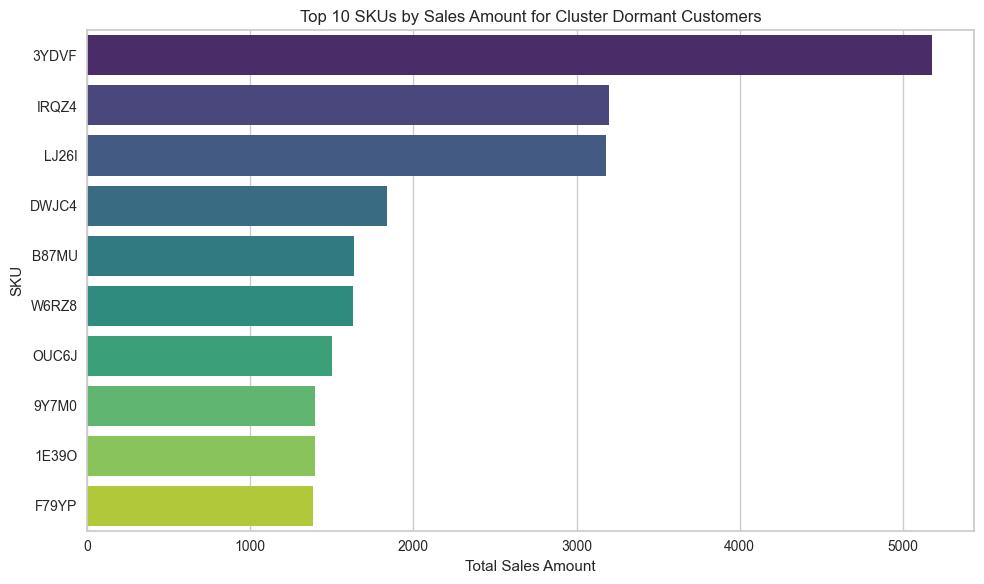

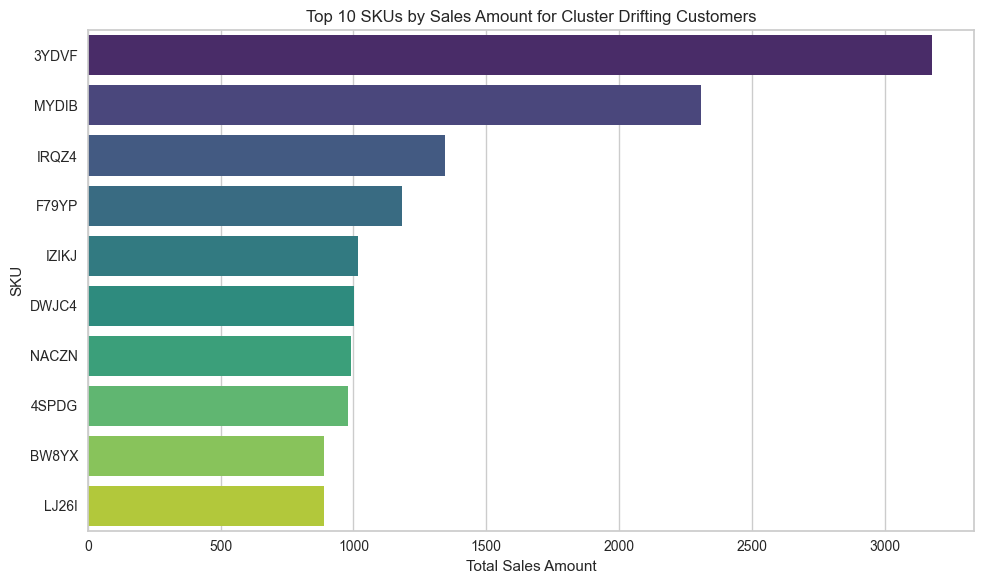

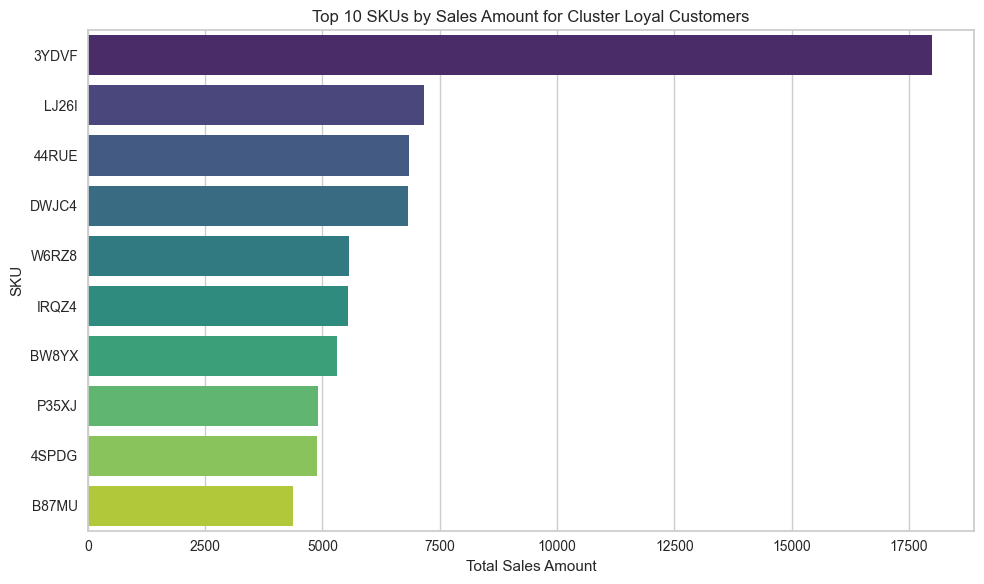

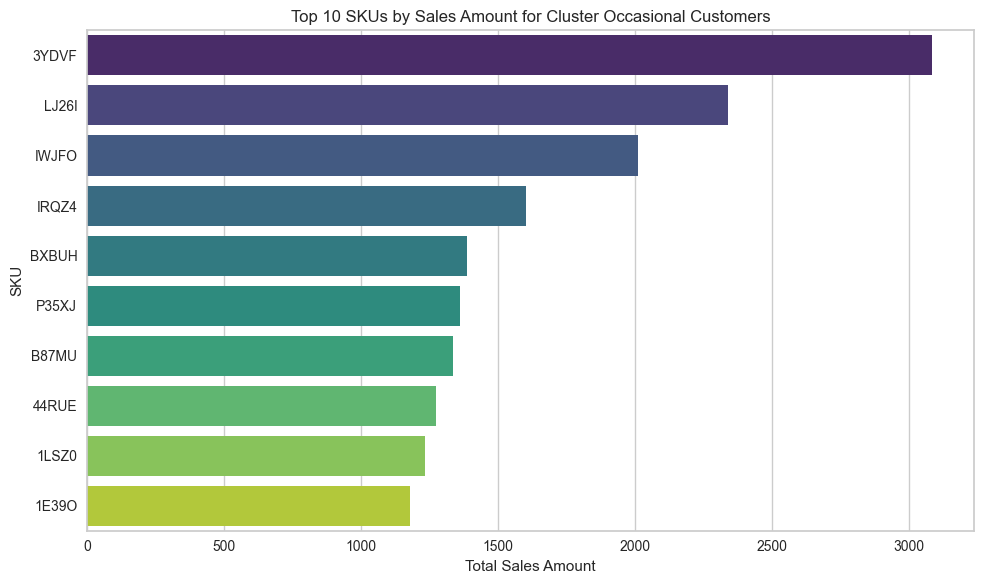

In [108]:
# Get unique clusters
clusters = top_skus_per_cluster['Cluster'].unique()

# Plotting
for cluster in clusters:
    cluster_data = top_skus_per_cluster[top_skus_per_cluster['Cluster'] == cluster]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=cluster_data,
        x='Sales_Amount',
        y='SKU',
        palette='viridis'
    )
    
    plt.title(f'Top 10 SKUs by Sales Amount for Cluster {cluster}')
    plt.xlabel('Total Sales Amount')
    plt.ylabel('SKU')
    plt.tight_layout()
    
    # Show plot
    plt.show()


**Overview of top SKUs according to Sales_Amount**

In [109]:
top_skus_per_cluster.head()

,Cluster,SKU,Sales_Amount
0,Dormant Customers,3YDVF,5178.57
1,Dormant Customers,IRQZ4,3199.15
2,Dormant Customers,LJ26I,3183.02
3,Dormant Customers,DWJC4,1840.43
4,Dormant Customers,B87MU,1636.75


In [110]:
e = pd.merge(top_skus_per_cluster, c, on='SKU', how='left')
e.head()

,Cluster,SKU,Sales_Amount,description
0,Dormant Customers,3YDVF,5178.57,Lady Stark Women Black & Red Floral Printed Fi...
1,Dormant Customers,IRQZ4,3199.15,MISH Women Pink & Navy Blue Candy Stripe Top
2,Dormant Customers,LJ26I,3183.02,Roadster Women Blue Boyfriend Fit Mid-Rise Low...
3,Dormant Customers,DWJC4,1840.43,Puma Unisex Navy Blue St Runner V2 Nl Sneakers
4,Dormant Customers,B87MU,1636.75,People Women Olive Green Striped Top


**Top 10 SKUs according to Sales_Amount for each Cluster**

In [111]:
# Get unique clusters
clusters = e['Cluster'].unique()

# Create a dictionary to hold DataFrames for each cluster
cluster_dfs = {cluster: e[e['Cluster'] == cluster] for cluster in clusters}

# Access individual DataFrames
df_cluster_1 = cluster_dfs[clusters[0]]
df_cluster_2 = cluster_dfs[clusters[1]]
df_cluster_3 = cluster_dfs[clusters[2]]
df_cluster_4 = cluster_dfs[clusters[3]]

In [112]:
# Optionally, print the DataFrames to check
print("DataFrame for Dormant Customers:")
df_cluster_1

DataFrame for Dormant Customers:


,Cluster,SKU,Sales_Amount,description
0,Dormant Customers,3YDVF,5178.57,Lady Stark Women Black & Red Floral Printed Fi...
1,Dormant Customers,IRQZ4,3199.15,MISH Women Pink & Navy Blue Candy Stripe Top
2,Dormant Customers,LJ26I,3183.02,Roadster Women Blue Boyfriend Fit Mid-Rise Low...
3,Dormant Customers,DWJC4,1840.43,Puma Unisex Navy Blue St Runner V2 Nl Sneakers
4,Dormant Customers,B87MU,1636.75,People Women Olive Green Striped Top
5,Dormant Customers,W6RZ8,1630.80,GAP Girls Logo Flippy Sequin Long Sleeve T-Shirt
6,Dormant Customers,OUC6J,1500.84,JEWEL JUNCTION Silver-Toned Geometric Cufflinks
7,Dormant Customers,9Y7M0,1396.35,Archies Love Gifts White Printed Ceramic Mug
8,Dormant Customers,1E39O,1393.84,Z-ZOOM Unisex Grey Square Sunglasses 55022
9,Dormant Customers,F79YP,1386.85,Indian Terrain Men Red Striped Polo Collar T-s...


In [113]:
print("DataFrame for Drifting Customers:")
df_cluster_2

DataFrame for Drifting Customers:


,Cluster,SKU,Sales_Amount,description
10,Drifting Customers,3YDVF,3177.07,Lady Stark Women Black & Red Floral Printed Fi...
11,Drifting Customers,MYDIB,2309.67,Geox Women Navy Blue Solid Leather Ballerinas
12,Drifting Customers,IRQZ4,1346.16,MISH Women Pink & Navy Blue Candy Stripe Top
13,Drifting Customers,F79YP,1181.01,Indian Terrain Men Red Striped Polo Collar T-s...
14,Drifting Customers,IZIKJ,1016.16,KLEIO Women Green Solid Sling Bag
15,Drifting Customers,DWJC4,1003.87,Puma Unisex Navy Blue St Runner V2 Nl Sneakers
16,Drifting Customers,NACZN,990.80,Pepe Jeans Girls Navy Blue Washed Skinny Fit L...
17,Drifting Customers,4SPDG,979.03,Park Avenue Men Navy Blue Slim Fit Solid Casua...
18,Drifting Customers,BW8YX,889.53,SKULT by Shahid Kapoor Men Charcoal Grey Print...
19,Drifting Customers,LJ26I,887.76,Roadster Women Blue Boyfriend Fit Mid-Rise Low...


In [114]:
print("DataFrame for Loyal Customers:")
df_cluster_3

DataFrame for Loyal Customers:


,Cluster,SKU,Sales_Amount,description
20,Loyal Customers,3YDVF,17982.01,Lady Stark Women Black & Red Floral Printed Fi...
21,Loyal Customers,LJ26I,7163.29,Roadster Women Blue Boyfriend Fit Mid-Rise Low...
22,Loyal Customers,44RUE,6852.72,Sonari Pack of 2 Full-Coverage Bras celina
23,Loyal Customers,DWJC4,6821.15,Puma Unisex Navy Blue St Runner V2 Nl Sneakers
24,Loyal Customers,W6RZ8,5571.90,GAP Girls Logo Flippy Sequin Long Sleeve T-Shirt
25,Loyal Customers,IRQZ4,5534.30,MISH Women Pink & Navy Blue Candy Stripe Top
26,Loyal Customers,BW8YX,5318.69,SKULT by Shahid Kapoor Men Charcoal Grey Print...
27,Loyal Customers,P35XJ,4900.32,Divine Casa Olive Green & Beige Geometric Reve...
28,Loyal Customers,4SPDG,4873.83,Park Avenue Men Navy Blue Slim Fit Solid Casua...
29,Loyal Customers,B87MU,4381.52,People Women Olive Green Striped Top


In [115]:
print("DataFrame for Occasional Customers:")
df_cluster_4

DataFrame for Occasional Customers:


,Cluster,SKU,Sales_Amount,description
30,Occasional Customers,3YDVF,3081.70,Lady Stark Women Black & Red Floral Printed Fi...
31,Occasional Customers,LJ26I,2337.38,Roadster Women Blue Boyfriend Fit Mid-Rise Low...
32,Occasional Customers,IWJFO,2011.76,Mufti Men White & Blue Regular Fit Printed Cas...
33,Occasional Customers,IRQZ4,1602.02,MISH Women Pink & Navy Blue Candy Stripe Top
34,Occasional Customers,BXBUH,1385.79,Calvin Klein Jeans Men Navy Blue Solid Laptop ...
35,Occasional Customers,P35XJ,1361.43,Divine Casa Olive Green & Beige Geometric Reve...
36,Occasional Customers,B87MU,1334.63,People Women Olive Green Striped Top
37,Occasional Customers,44RUE,1272.09,Sonari Pack of 2 Full-Coverage Bras celina
38,Occasional Customers,1LSZ0,1232.63,Spray Vaporisateur Women Edp 100Ml
39,Occasional Customers,1E39O,1179.97,Z-ZOOM Unisex Grey Square Sunglasses 55022


### Top 10 products for each of the clusters by Quantity sold

**Overview of the Original Dataframe**

In [116]:
d.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,GENDER,AGE,GEOGRAPHY,Cluster,description
0,2021-01-02,2547,1,X52,0EM7L,1.0,3.13,M,43,Greece,Drifting Customers,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,2021-01-02,4948,75,TVL,6ASJR,1.0,6.00,F,27,Italy,Dormant Customers,Roadster Women Navy Blue Striped Mandarin Coll...
2,2021-01-02,4530,74,FZT,KZOT8,1.0,4.91,F,37,France,Dormant Customers,DKNY Women Nectar Love Eau de Toilette 50 ml
3,2021-01-02,4122,76,SJS,4BPPU,1.0,118.35,F,34,Germany,Dormant Customers,Chhabra 555 Red & Beige Printed Bhagalpuri Saree
4,2021-01-02,4122,76,29A,LPLTZ,1.0,3.90,F,34,Germany,Dormant Customers,DOROTHY PERKINS Women Black Regular Fit Solid ...


**Get the top 10 SKUs by 'Quantity' for each cluster**

In [117]:
# Group by 'Cluster' and 'SKU', then sum the 'Quantity'
sales_summary2 = d.groupby(['Cluster', 'SKU'])['Quantity'].sum().reset_index()

# For each cluster, get the top 10 SKUs by 'Quantity'
top_skus_per_cluster2 = sales_summary2.groupby('Cluster').apply(lambda x: x.nlargest(10, 'Quantity')).reset_index(drop=True)

**Plotting Top 10 SKUs according to Quantity for each Cluster**

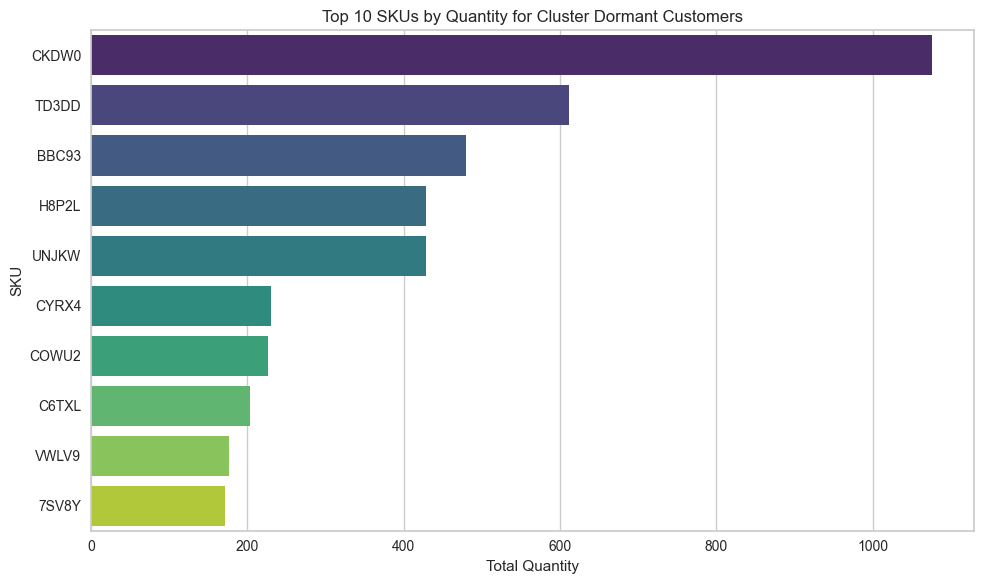

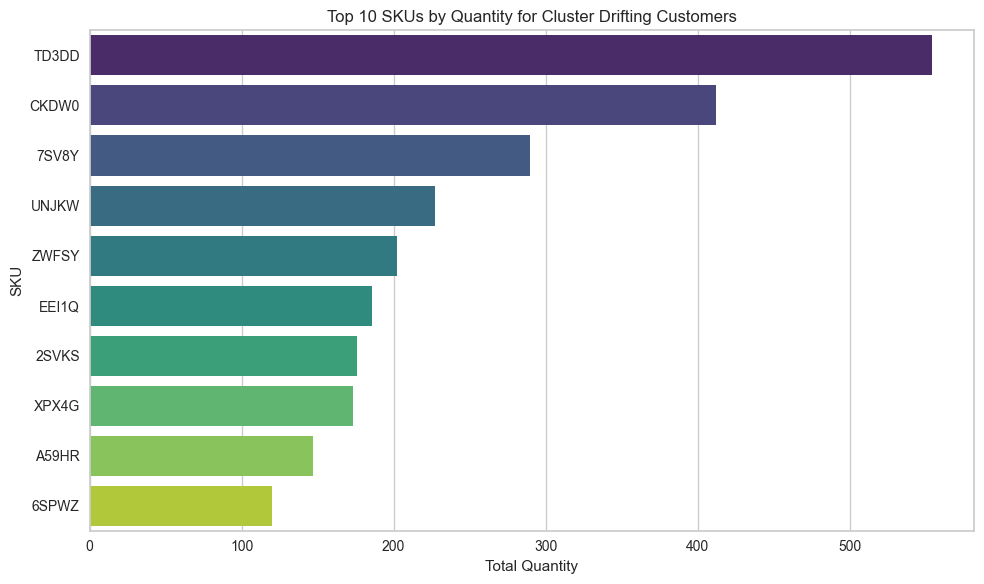

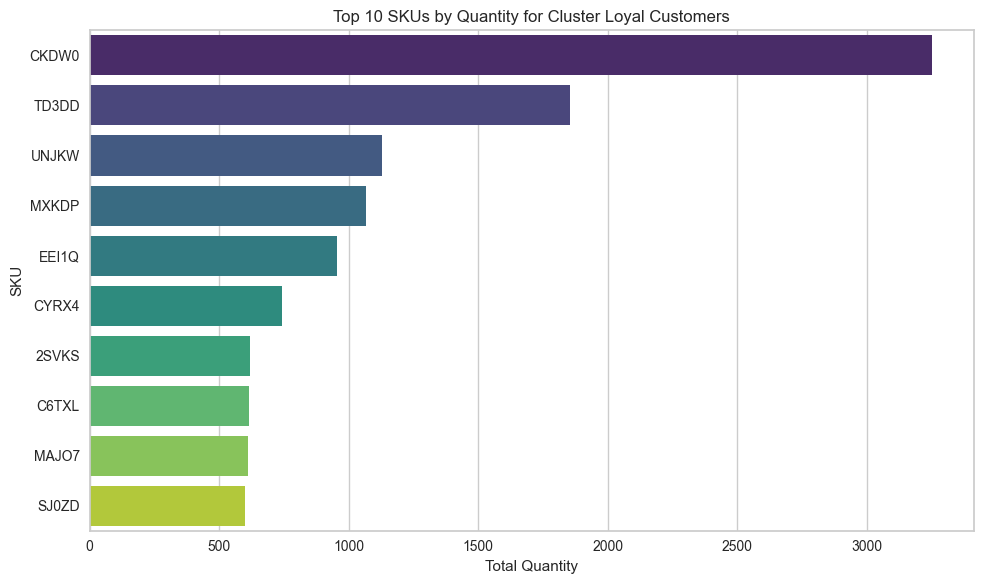

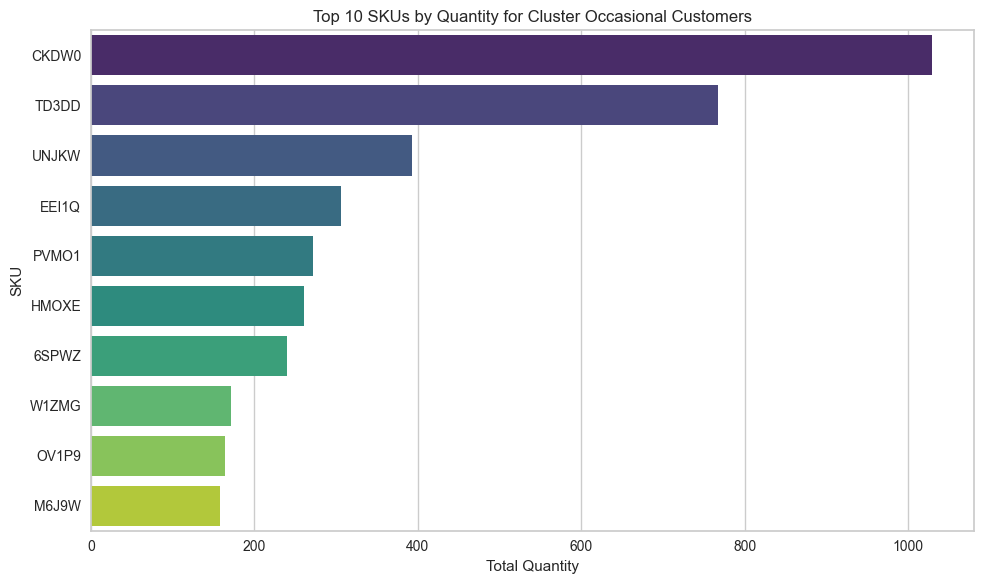

In [118]:
# Get unique clusters
clusters = top_skus_per_cluster2['Cluster'].unique()

# Plotting
for cluster in clusters:
    cluster_data = top_skus_per_cluster2[top_skus_per_cluster2['Cluster'] == cluster]
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=cluster_data,
        x='Quantity',
        y='SKU',
        palette='viridis'
    )
    
    plt.title(f'Top 10 SKUs by Quantity for Cluster {cluster}')
    plt.xlabel('Total Quantity')
    plt.ylabel('SKU')
    plt.tight_layout()
    
    # Show plot
    plt.show()

**Overview of SKU descriptions**

In [119]:
c.head()

,SKU,description
0,0EM7L,U.S. Polo Assn. Kids Girls Pink & Blue Printed...
1,68BRQ,W Women Off-White & Charcoal Grey Printed Stra...
2,CZUZX,Studio Voylla Gold-Toned & Green Square Jhumkas
3,549KK,Roadster Women Black Skinny Fit Mid-Rise Mildl...
4,K8EHH,AURELIA Women Blue & Golden Printed Straight K...


**Overview of the dataframe which contains information of Top SKUs according to Quantity**

In [120]:
top_skus_per_cluster2.head()

,Cluster,SKU,Quantity
0,Dormant Customers,CKDW0,1076.0
1,Dormant Customers,TD3DD,612.0
2,Dormant Customers,BBC93,480.0
3,Dormant Customers,H8P2L,428.0
4,Dormant Customers,UNJKW,428.0


**Getting description for each Top SKUs**

In [121]:
f = pd.merge(top_skus_per_cluster2, c, on='SKU', how='left')
f.head()

,Cluster,SKU,Quantity,description
0,Dormant Customers,CKDW0,1076.0,Sergio Tacchini Men White Sneakers
1,Dormant Customers,TD3DD,612.0,Cortina White & Green Set of 2 Printed Long Do...
2,Dormant Customers,BBC93,480.0,XYXX Men Printed Pack of 2 Remix Pure Cotton B...
3,Dormant Customers,H8P2L,428.0,WROGN Men Blue & Black Colourblocked Pullover ...
4,Dormant Customers,UNJKW,428.0,GNIST Women Pink Solid Heels


**Overview of Top SKUs according to Quantity for each Cluster**

In [122]:
# Get unique clusters
clusters = f['Cluster'].unique()

# Create a dictionary to hold DataFrames for each cluster
cluster_dfs = {cluster: f[f['Cluster'] == cluster] for cluster in clusters}

# Access individual DataFrames
df_cluster_1qty = cluster_dfs[clusters[0]]
df_cluster_2qty = cluster_dfs[clusters[1]]
df_cluster_3qty = cluster_dfs[clusters[2]]
df_cluster_4qty = cluster_dfs[clusters[3]]

In [123]:
# Optionally, print the DataFrames to check
print("DataFrame for Dormant Customers:")
df_cluster_1qty

DataFrame for Dormant Customers:


,Cluster,SKU,Quantity,description
0,Dormant Customers,CKDW0,1076.0,Sergio Tacchini Men White Sneakers
1,Dormant Customers,TD3DD,612.0,Cortina White & Green Set of 2 Printed Long Do...
2,Dormant Customers,BBC93,480.0,XYXX Men Printed Pack of 2 Remix Pure Cotton B...
3,Dormant Customers,H8P2L,428.0,WROGN Men Blue & Black Colourblocked Pullover ...
4,Dormant Customers,UNJKW,428.0,GNIST Women Pink Solid Heels
5,Dormant Customers,CYRX4,230.0,SEJ by Nisha Gupta Set of 6 Green & Pink Print...
6,Dormant Customers,COWU2,227.0,Lady Love Blue Solid Non-Wired Non Padded Mini...
7,Dormant Customers,C6TXL,203.0,Indian Terrain Men Red & White Slim Fit Checke...
8,Dormant Customers,VWLV9,176.0,Kraft Cellar Women Gold-Toned Solid Open Toe F...
9,Dormant Customers,7SV8Y,171.0,Inc 5 Women Silver-Toned Solid Sandals


In [124]:
print("DataFrame for Drifting Customers:")
df_cluster_2qty

DataFrame for Drifting Customers:


,Cluster,SKU,Quantity,description
10,Drifting Customers,TD3DD,554.0,Cortina White & Green Set of 2 Printed Long Do...
11,Drifting Customers,CKDW0,412.0,Sergio Tacchini Men White Sneakers
12,Drifting Customers,7SV8Y,290.0,Inc 5 Women Silver-Toned Solid Sandals
13,Drifting Customers,UNJKW,227.0,GNIST Women Pink Solid Heels
14,Drifting Customers,ZWFSY,202.0,Tistabene Gold-Plated Contemporary Enamelled J...
15,Drifting Customers,EEI1Q,186.0,Fancy Mart Orange & Green Artificial Fruit Bon...
16,Drifting Customers,2SVKS,176.0,612 league Boys Orange Printed Round Neck T-shirt
17,Drifting Customers,XPX4G,173.0,EthnoVogue Women Beige & Grey Made to Measure ...
18,Drifting Customers,A59HR,147.0,Cortina Set of 2 Window Curtains
19,Drifting Customers,6SPWZ,120.0,MomToBe Women Black Printed Straight Maternity...


In [125]:
print("DataFrame for Loyal Customers:")
df_cluster_3qty

DataFrame for Loyal Customers:


,Cluster,SKU,Quantity,description
20,Loyal Customers,CKDW0,3252.0,Sergio Tacchini Men White Sneakers
21,Loyal Customers,TD3DD,1853.0,Cortina White & Green Set of 2 Printed Long Do...
22,Loyal Customers,UNJKW,1131.0,GNIST Women Pink Solid Heels
23,Loyal Customers,MXKDP,1066.0,American Crew Men Blue Slim Fit Mid-Rise Low D...
24,Loyal Customers,EEI1Q,956.0,Fancy Mart Orange & Green Artificial Fruit Bon...
25,Loyal Customers,CYRX4,743.0,SEJ by Nisha Gupta Set of 6 Green & Pink Print...
26,Loyal Customers,2SVKS,619.0,612 league Boys Orange Printed Round Neck T-shirt
27,Loyal Customers,C6TXL,615.0,Indian Terrain Men Red & White Slim Fit Checke...
28,Loyal Customers,MAJO7,613.0,Hypernation Women Grey Solid Open Front Shrug
29,Loyal Customers,SJ0ZD,600.0,Invincible Men Red Solid Round Neck Athleisure...


In [126]:
print("DataFrame for Occasional Customers:")
df_cluster_4qty

DataFrame for Occasional Customers:


,Cluster,SKU,Quantity,description
30,Occasional Customers,CKDW0,1029.0,Sergio Tacchini Men White Sneakers
31,Occasional Customers,TD3DD,767.0,Cortina White & Green Set of 2 Printed Long Do...
32,Occasional Customers,UNJKW,393.0,GNIST Women Pink Solid Heels
33,Occasional Customers,EEI1Q,306.0,Fancy Mart Orange & Green Artificial Fruit Bon...
34,Occasional Customers,PVMO1,272.0,Rozia Hair Crimper Corn Styler HR780
35,Occasional Customers,HMOXE,261.0,Molly & Michel Men Mustard Yellow Solid Straig...
36,Occasional Customers,6SPWZ,240.0,MomToBe Women Black Printed Straight Maternity...
37,Occasional Customers,W1ZMG,171.0,Louis Philippe Sport Men Blue Slim Fit Solid R...
38,Occasional Customers,OV1P9,164.0,Homesake Gold-Toned & White Solid Handcrafted ...
39,Occasional Customers,M6J9W,158.0,Bruno Manetti Men Brown Suede Horsebit Loafers
